In [79]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.9 MB/s eta 0:00:002.8 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.legend_handler import HandlerLine2D
import lmoments
from matplotlib.pylab import rcParams
import warnings as _warnings
from collections import OrderedDict
from numpy.random import randint as _randint
import lmoments
from pdb import set_trace as stop
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import genextreme as gev
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns





In [3]:
stazioni = ["andria", "bari","barletta_casardi", 
            "brindisi", "brindisi_sisri", "candela_ex_comes", 
            "carbonara", "casamassima", "cisternino", "foggia", 
            "francavilla_fontana", "galatina", "grottaglie", 
            "lecce", "lecce_cerrate", "maglie", "manfredonia_liceo", 
            "massafra", "molfetta", "monopoli", "san_pancrazio_salentino", 
            "san_severo", "taranto", "taranto_san_vito", "torchiarolo"]

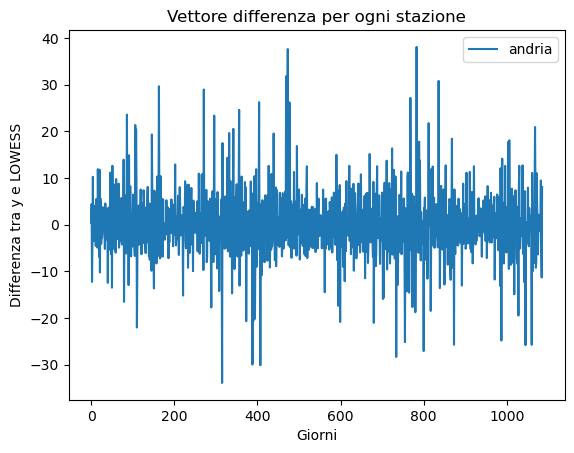

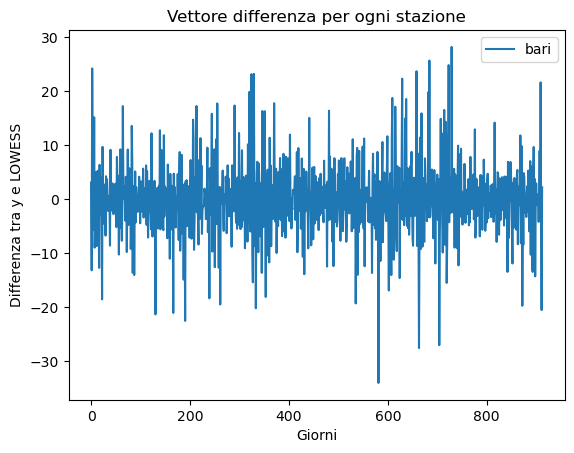

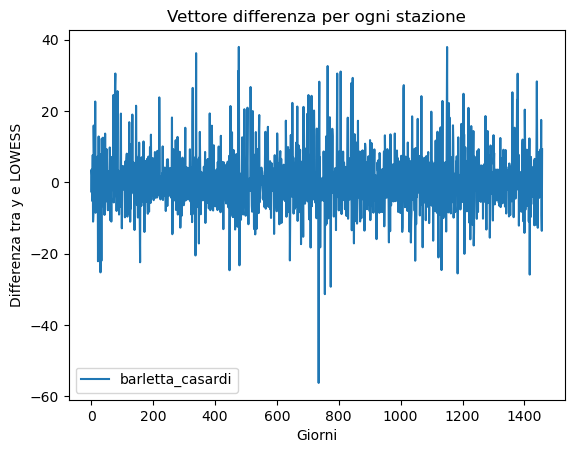

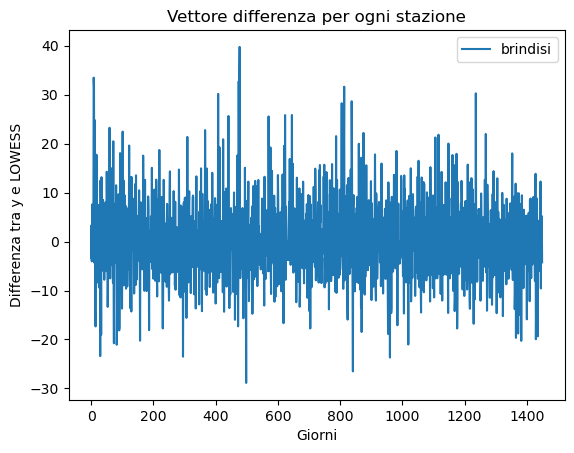

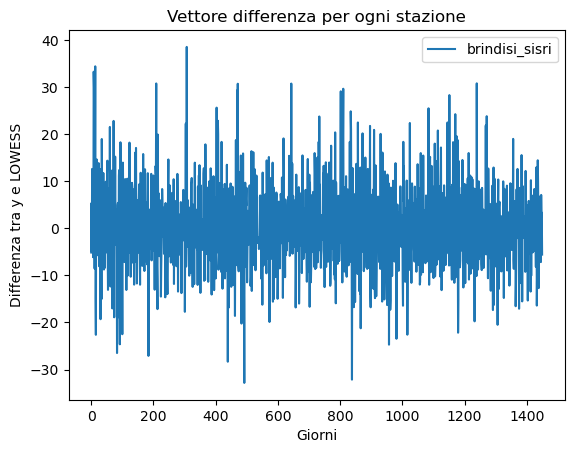

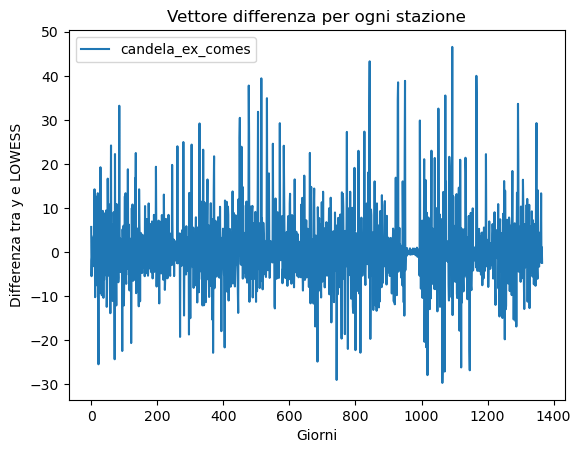

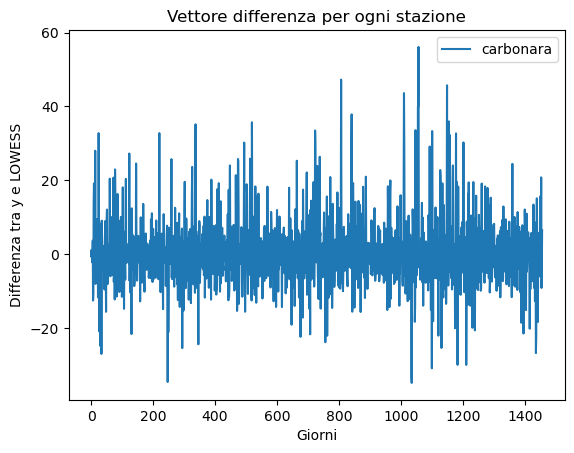

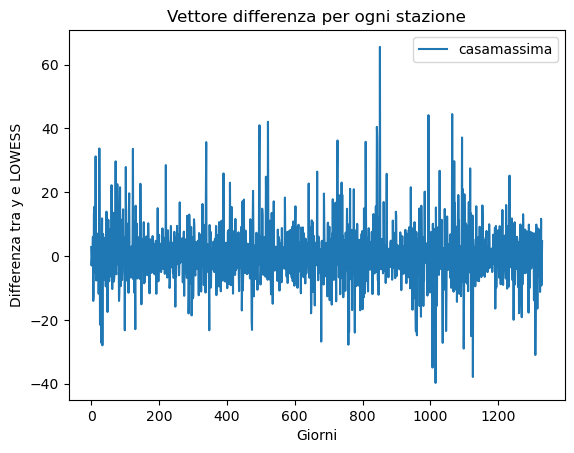

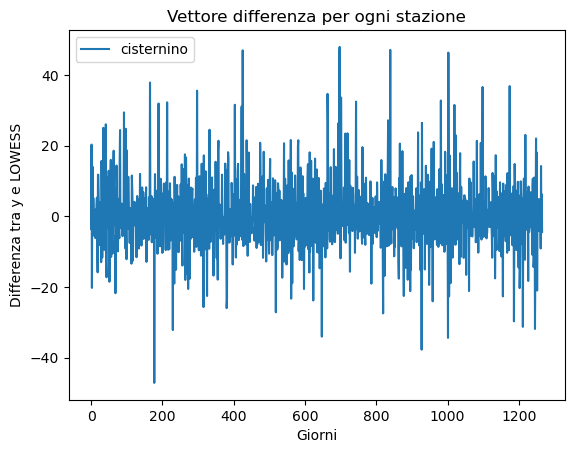

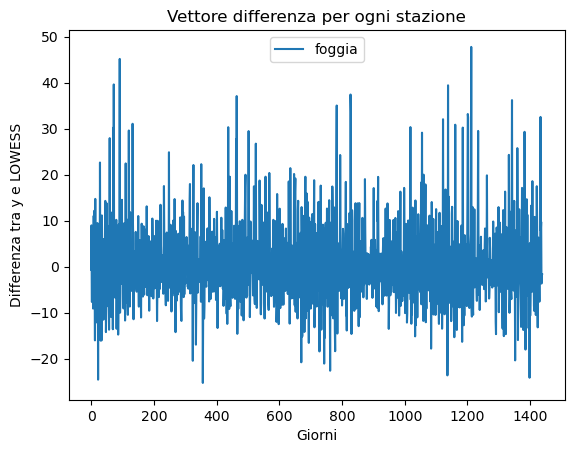

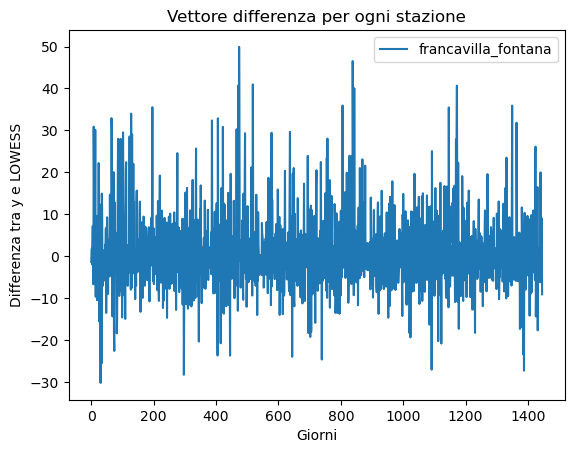

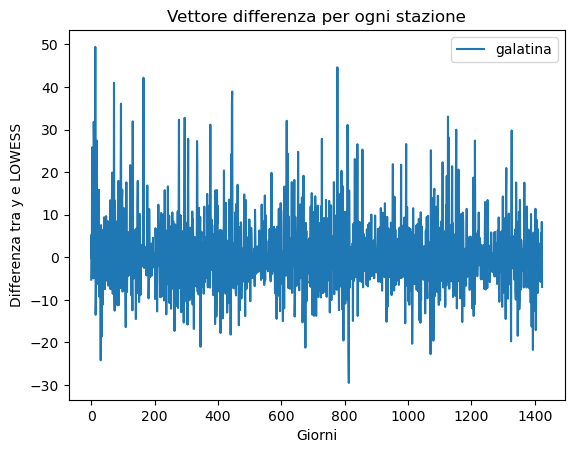

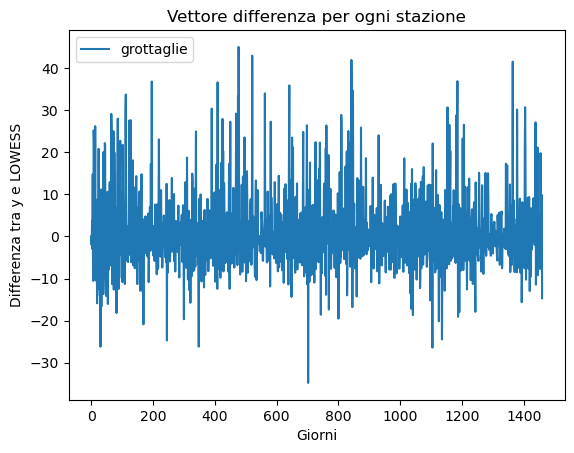

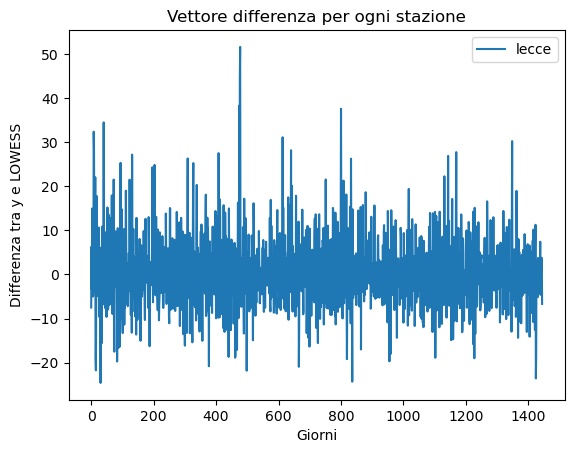

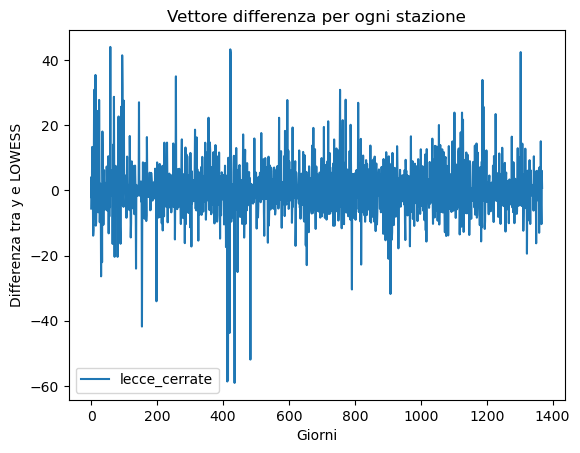

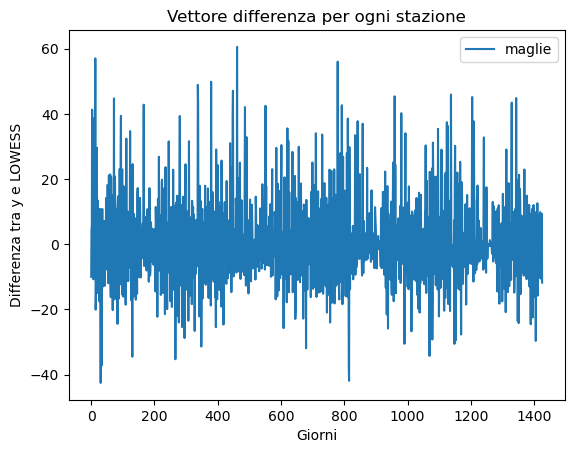

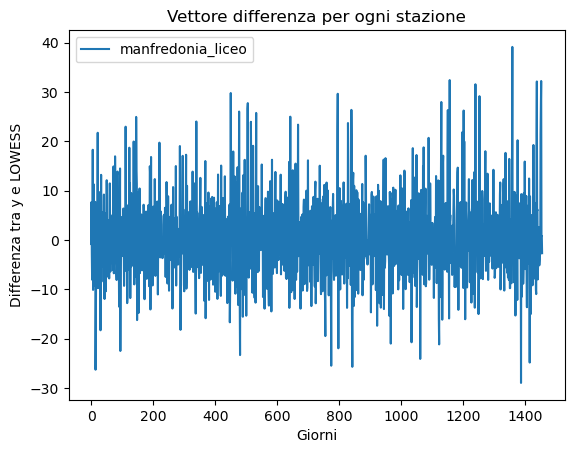

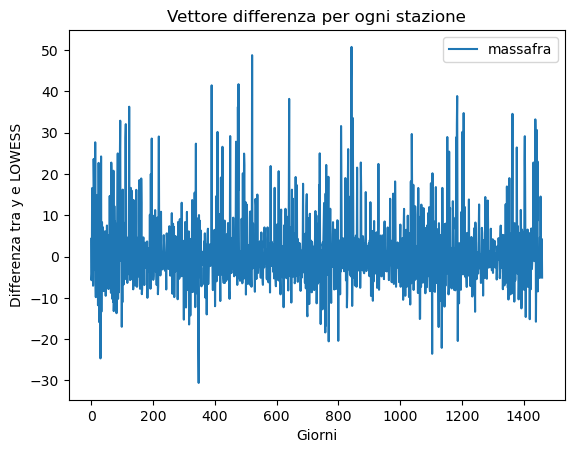

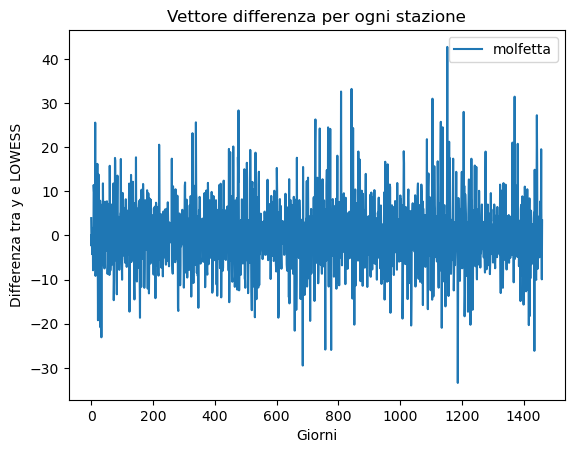

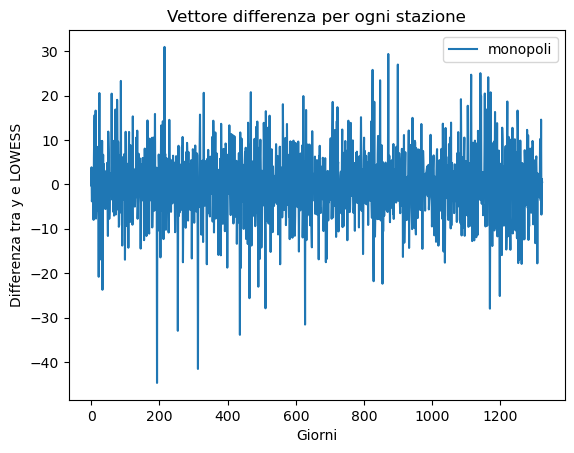

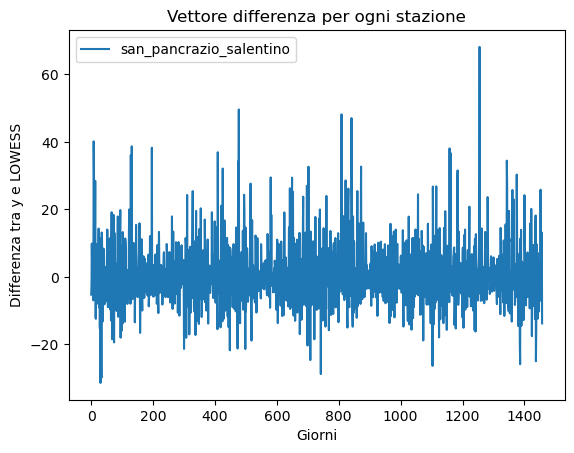

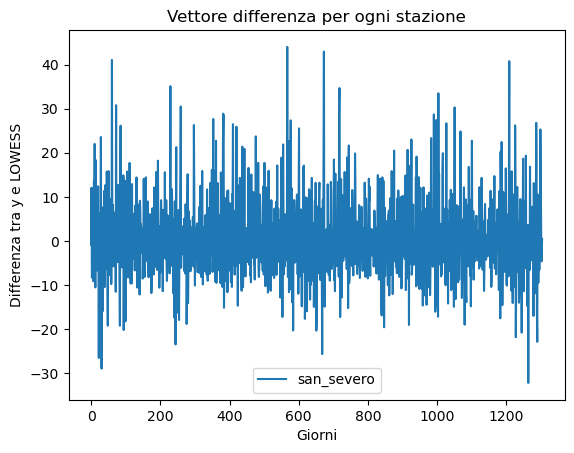

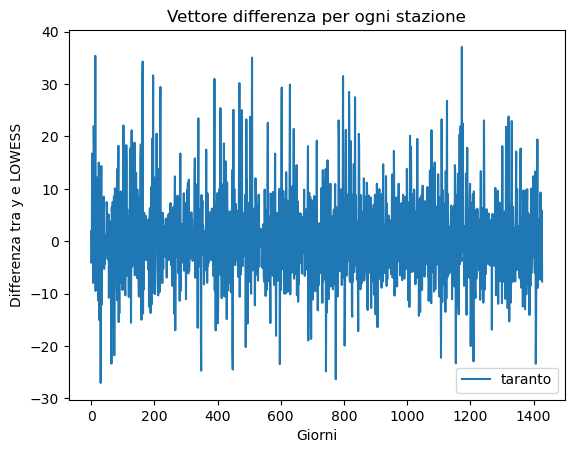

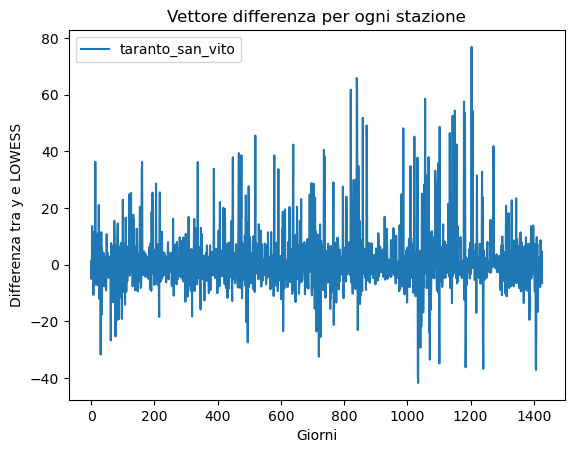

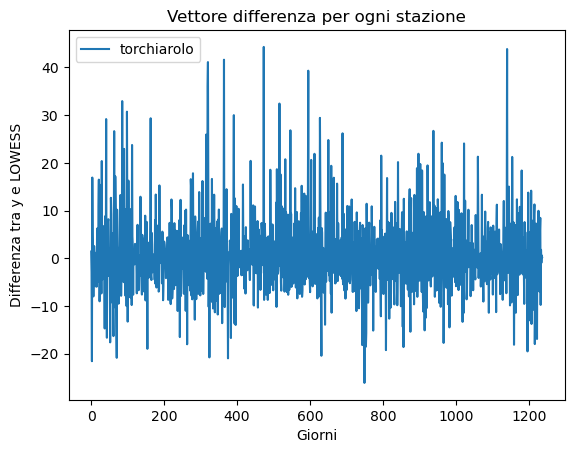

In [5]:
vettori_differenza = []
for i in range (0, len(stazioni)):
    path = f"/Users/reginacastrovilli/paper/Data_Max_Min/{stazioni[i]}.csv"
    file = pd.read_csv(path,sep=";")
    dat_0 = file['umr_min'] #umr_min
    y = dat_0.dropna()

    #filtro Lowess
    lowess = sm.nonparametric.lowess(y, range(len(y)), frac = 0.007)
    lowess_y = lowess[:,1]

    #calcolo vettore differenza
    Y_low = y - lowess_y

    #aggiunta vettore differenza alla lista
    vettori_differenza.append(Y_low)

#plot tutti i vettori differenza
for i, stazione in enumerate(stazioni):
    plt.plot(range(len(vettori_differenza[i])), vettori_differenza[i], label = stazione)
    
    #etichette
    plt.xlabel('Giorni')
    plt.ylabel('Differenza tra y e LOWESS')
    plt.title('Vettore differenza per ogni stazione')
    plt.legend()
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/umr_min-low/{stazione}.pdf")
    plt.show()

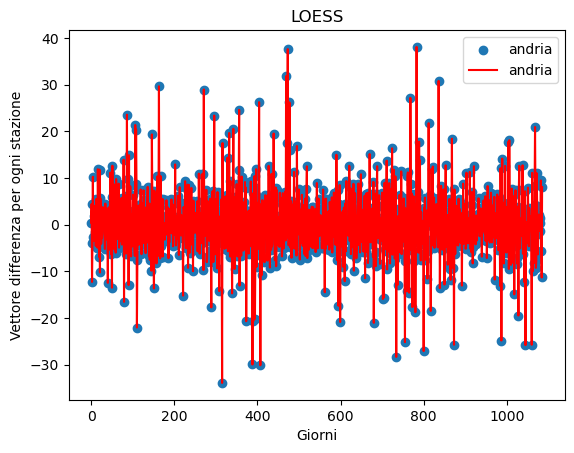

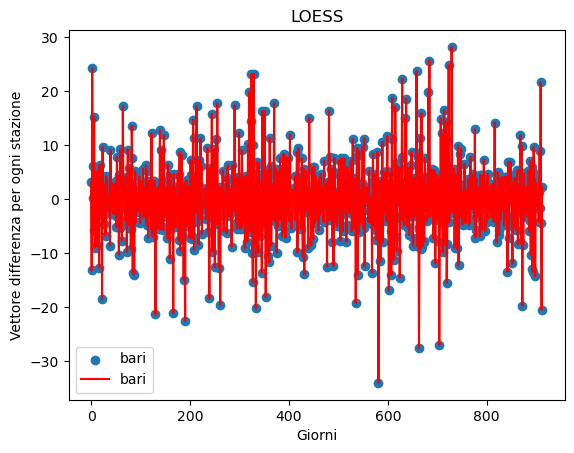

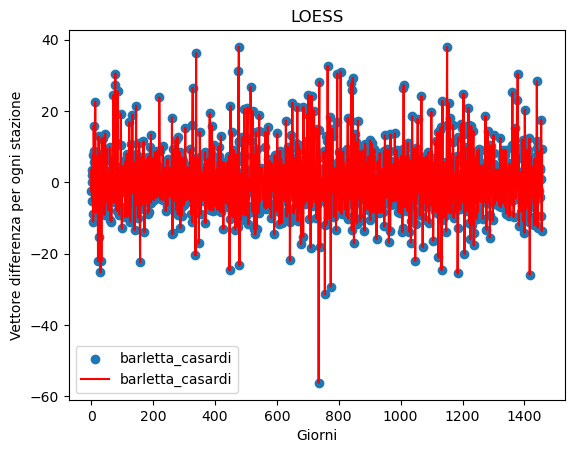

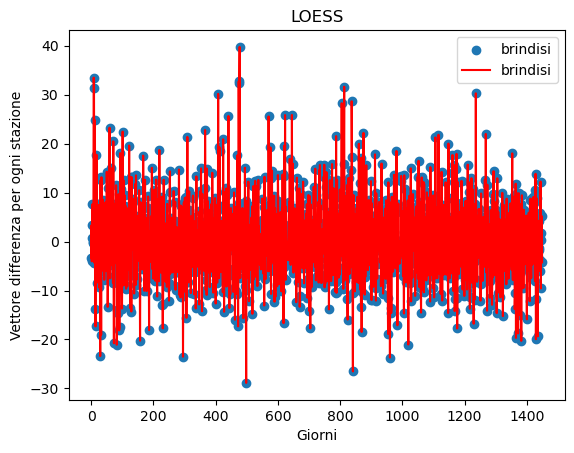

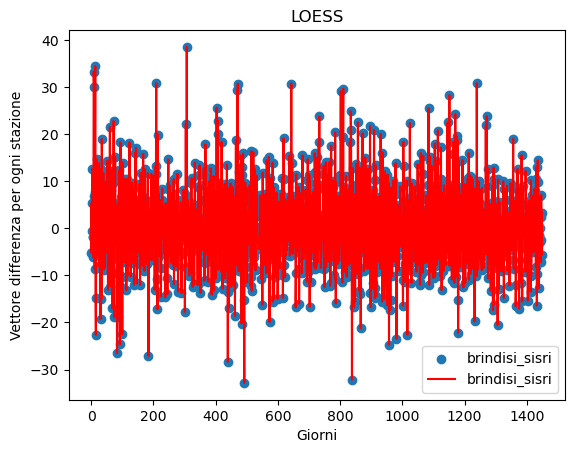

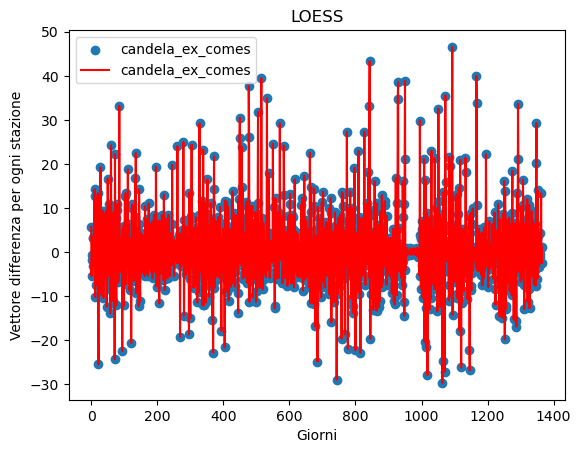

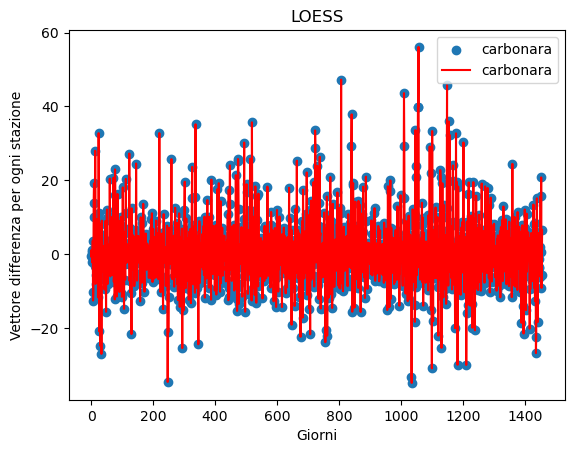

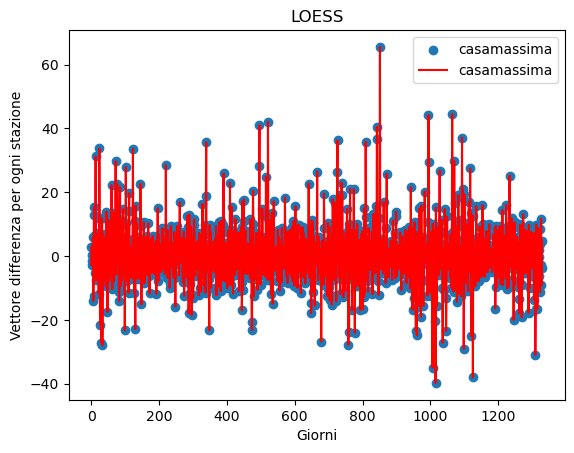

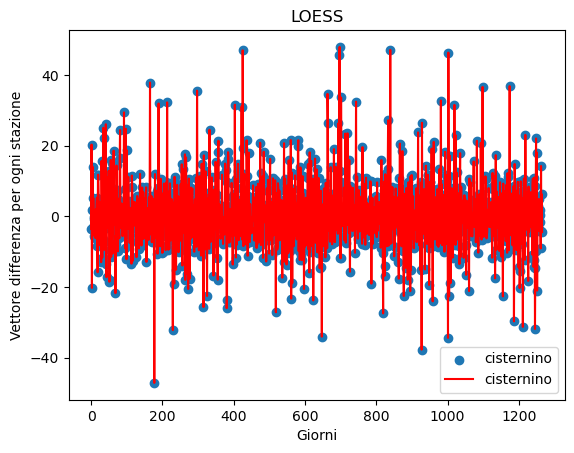

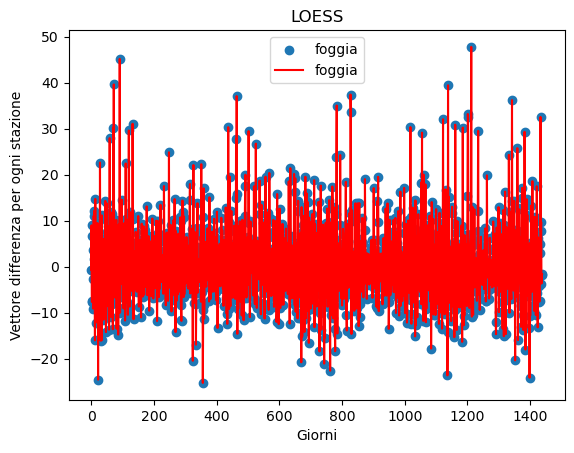

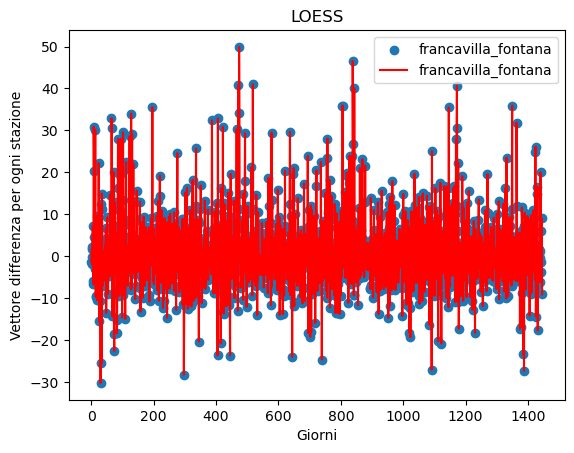

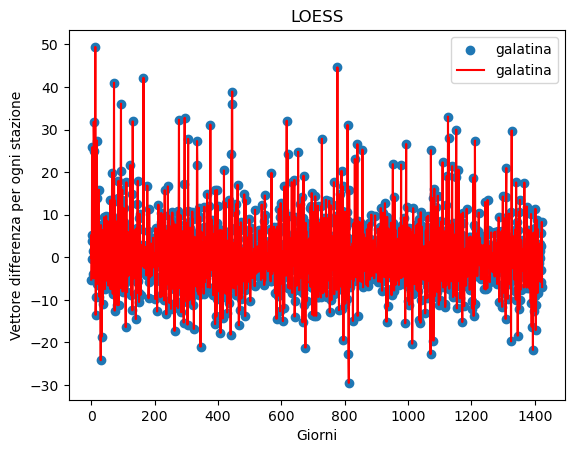

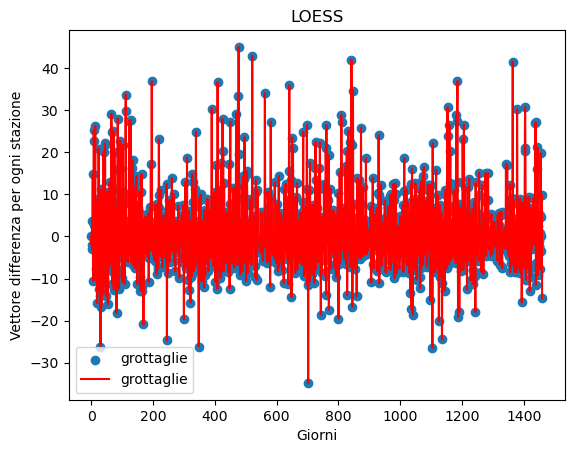

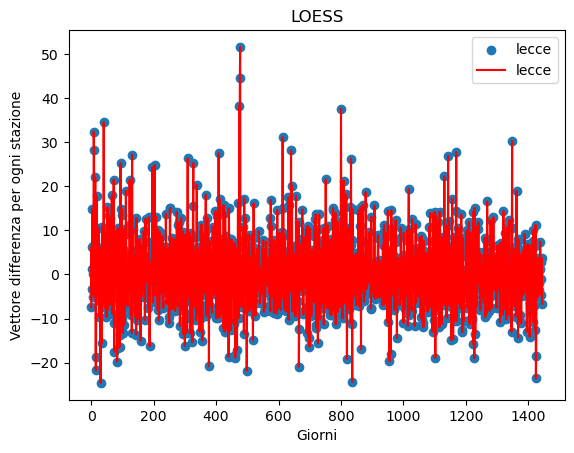

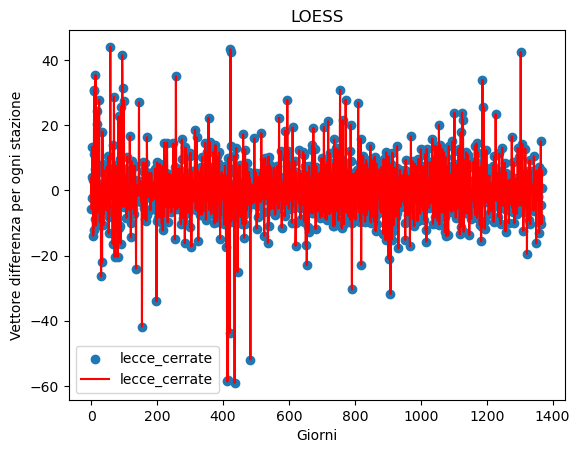

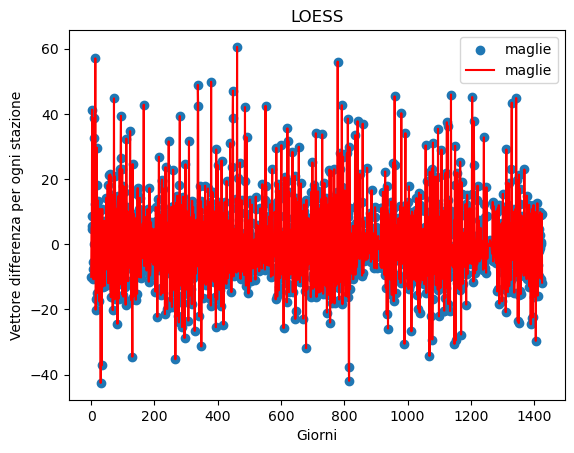

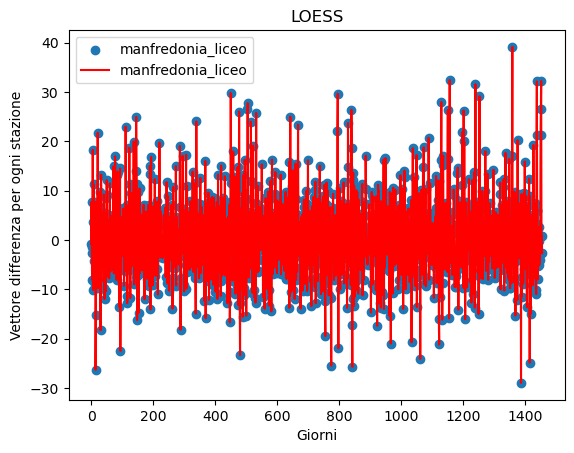

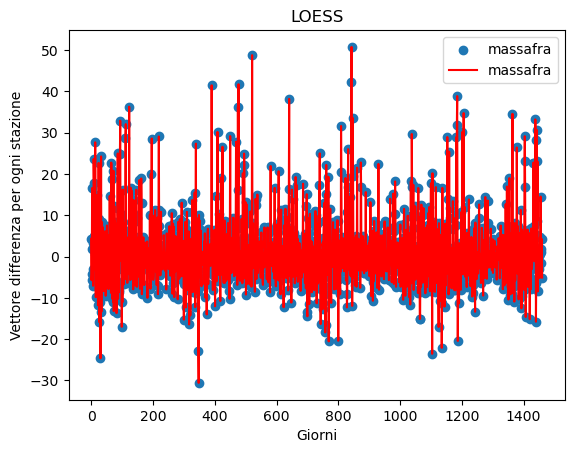

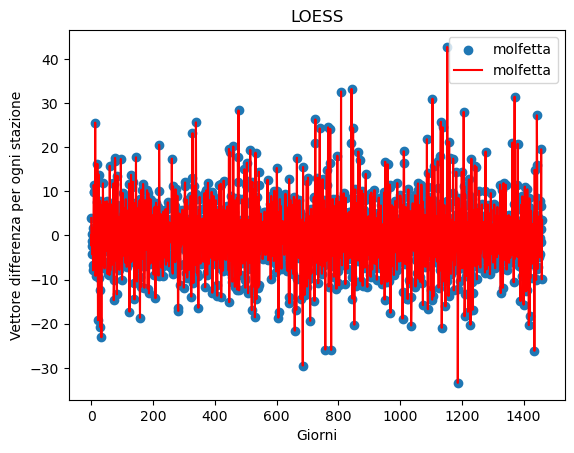

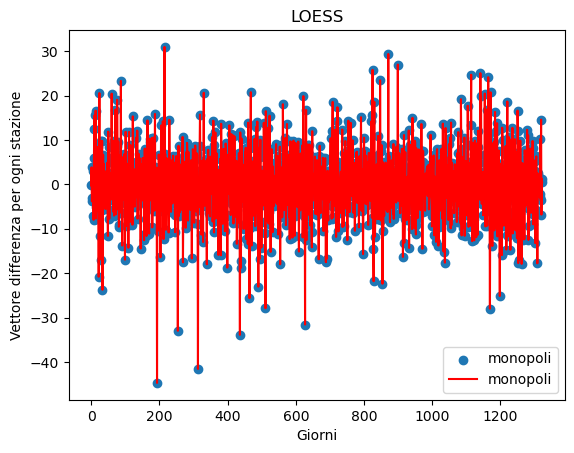

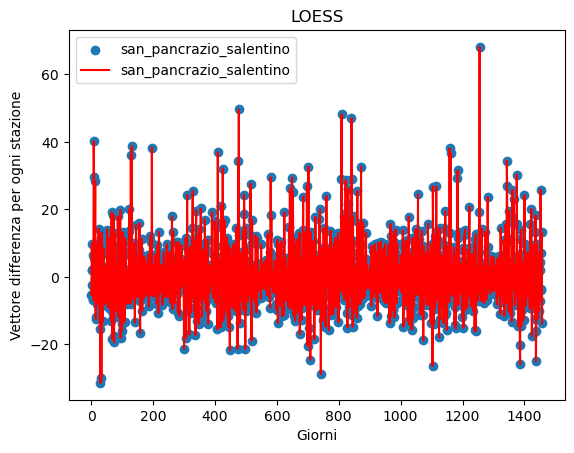

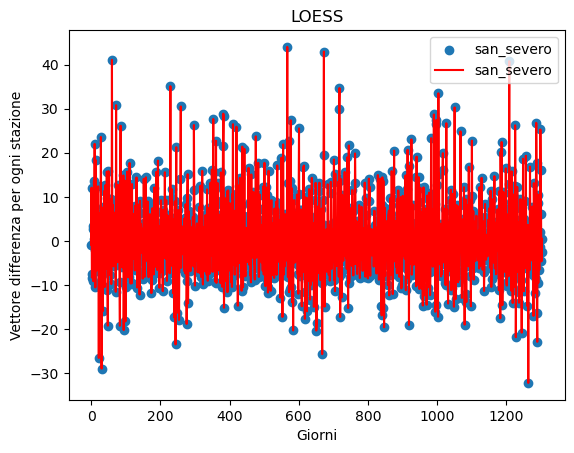

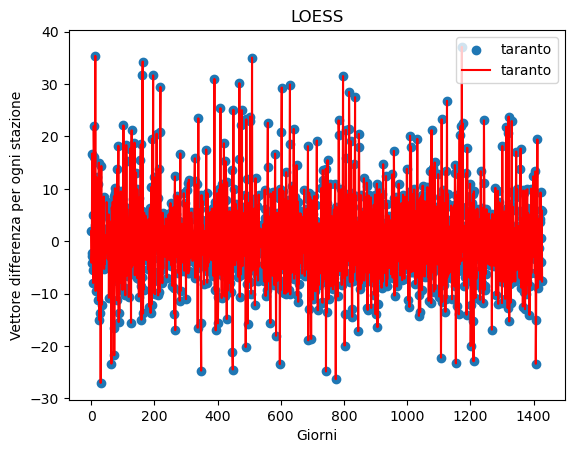

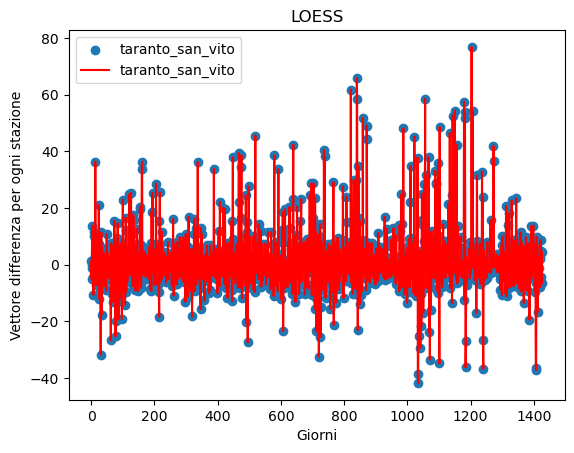

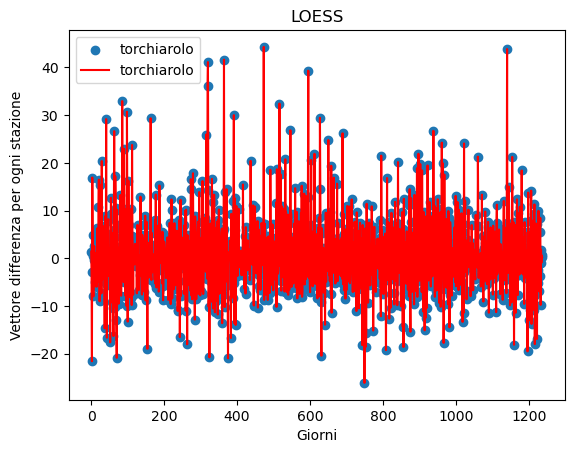

In [6]:
vettori_differenza = []
for i in range (0, len(stazioni)):
    path = f"/Users/reginacastrovilli/paper/Data_Max_Min/{stazioni[i]}.csv"
    file = pd.read_csv(path,sep=";")
    dat_0 = file['umr_min'] #umr_min
    y = dat_0.dropna()

    #filtro Lowess
    lowess = sm.nonparametric.lowess(y, range(len(y)), frac = 0.007)
    lowess_y = lowess[:,1]

    #calcolo vettore differenza
    Y_low = y - lowess_y
    
    #aggiunta vettore differenza alla lista
    vettori_differenza.append(Y_low)

#plot tutti i vettori differenza
for i, stazione in enumerate(stazioni):
    plt.scatter(range(len(vettori_differenza[i])), vettori_differenza[i], label = stazione)
    plt.plot(range(len(vettori_differenza[i])), vettori_differenza[i], color = 'red', label = stazione)
    
    
    #etichette
    plt.xlabel('Giorni')
    plt.ylabel('Vettore differenza per ogni stazione')
    plt.title('LOESS')
    plt.legend()
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/Loess_con_frac/Loess_con_frac_umr.pdf")
    plt.show()

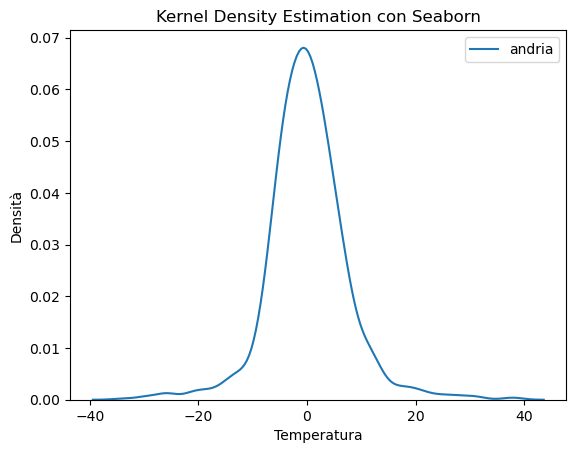

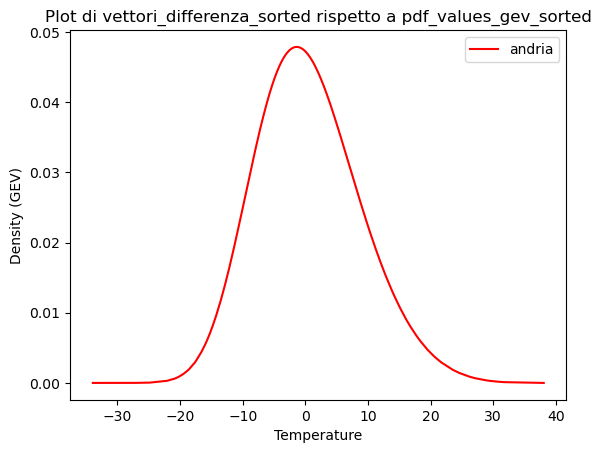

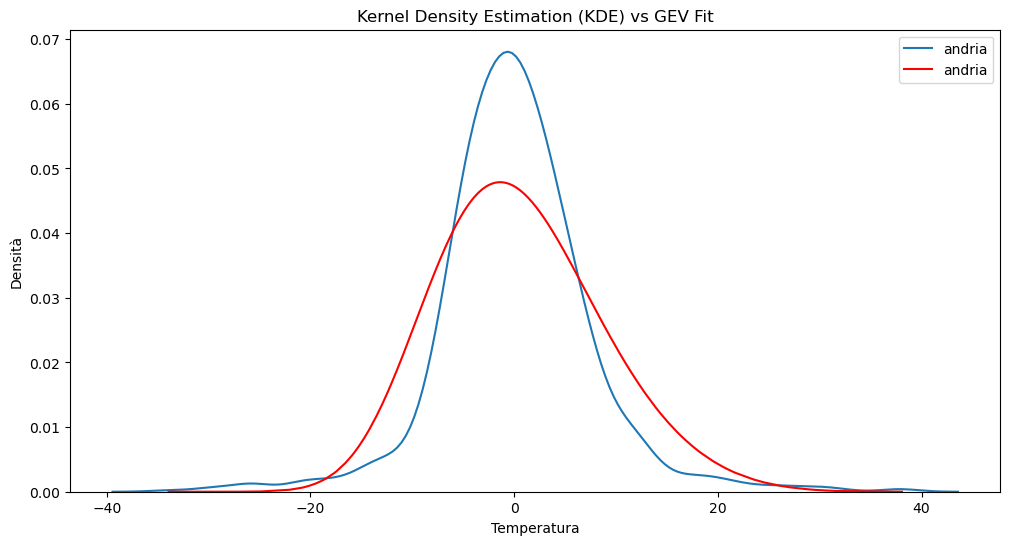

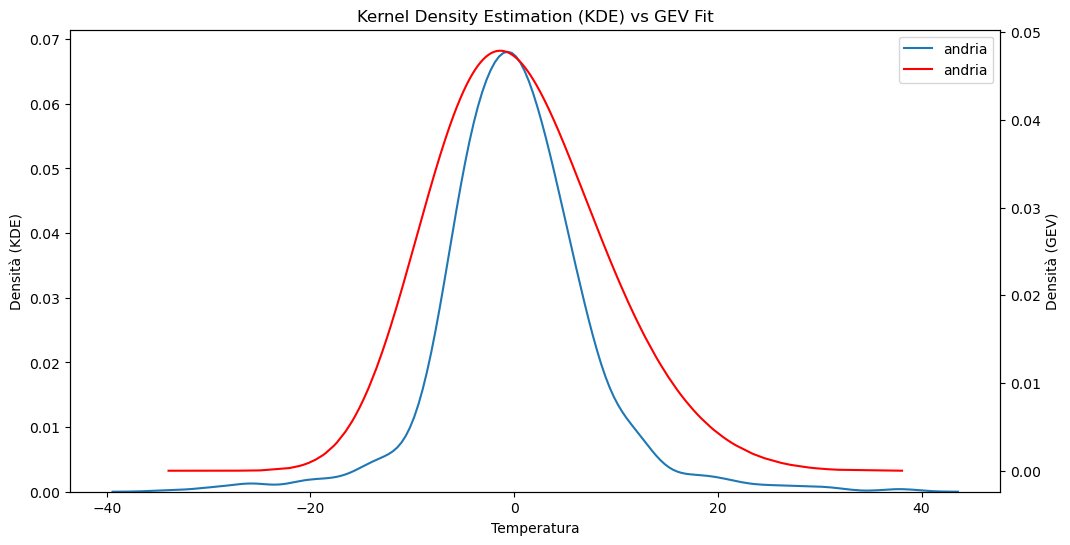

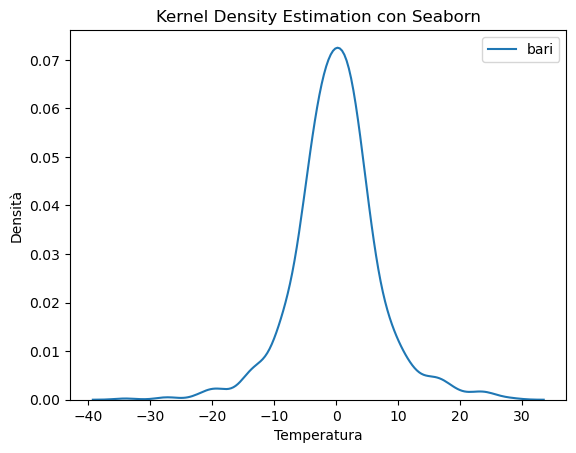

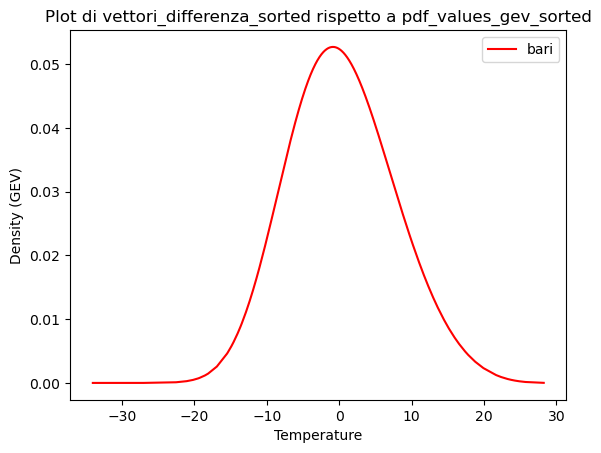

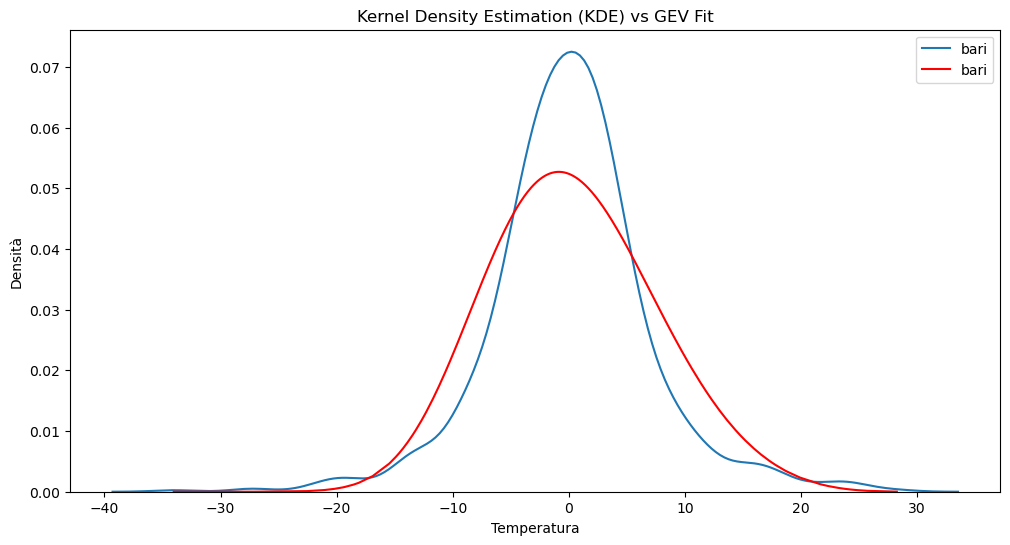

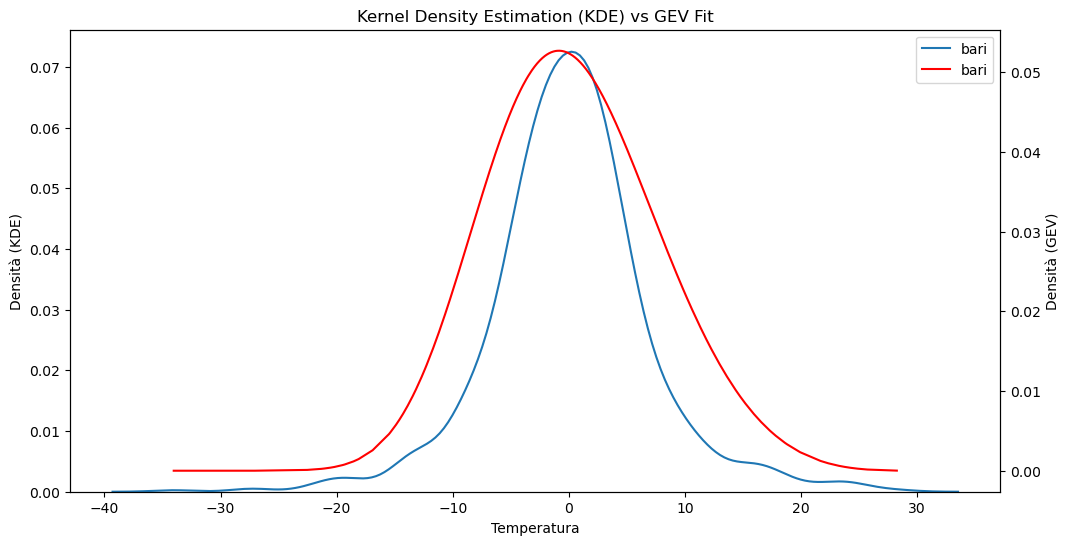

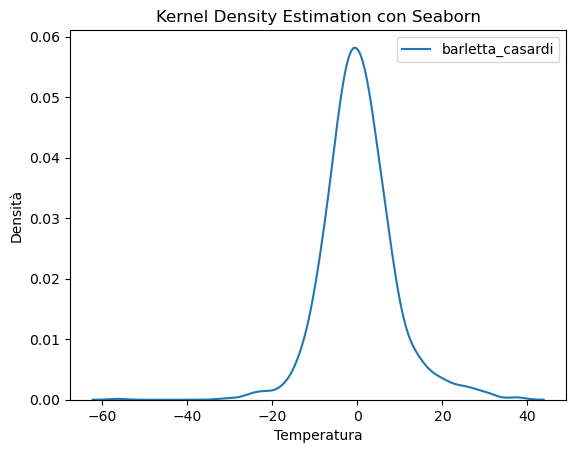

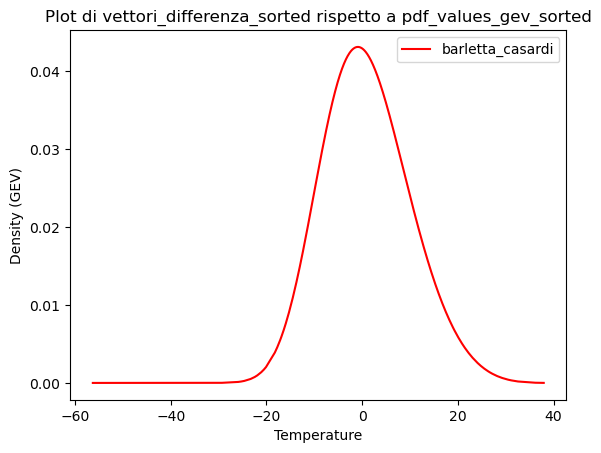

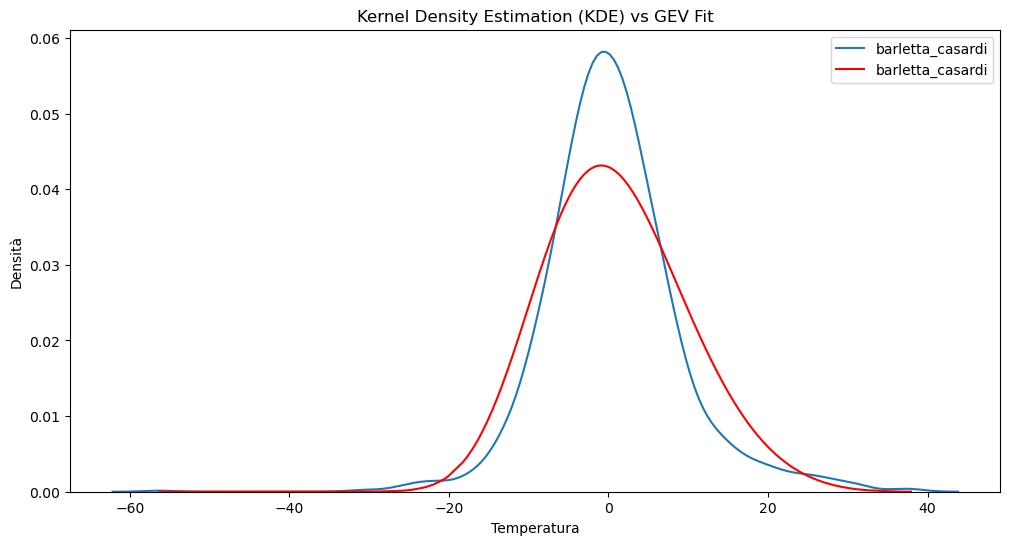

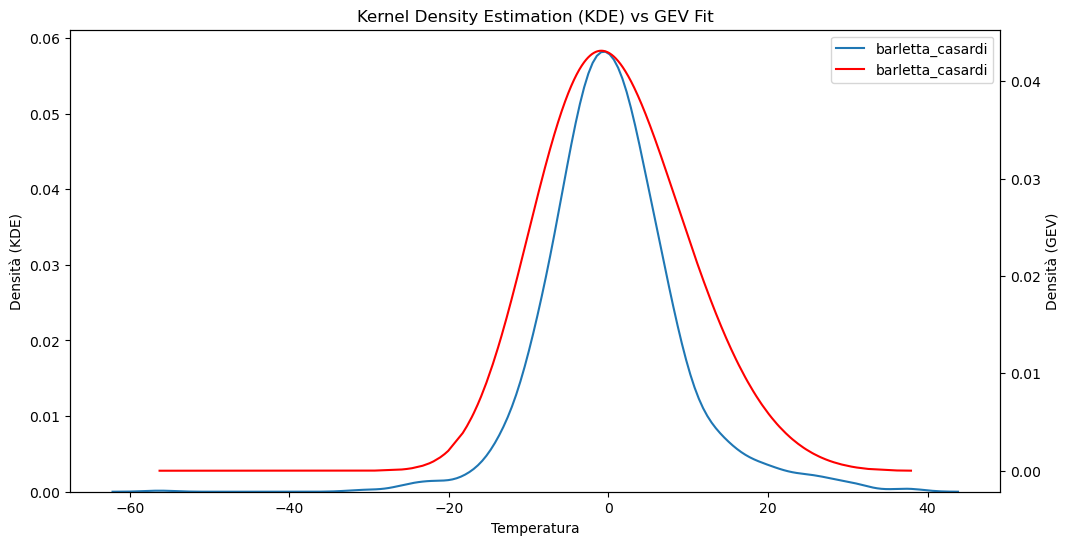

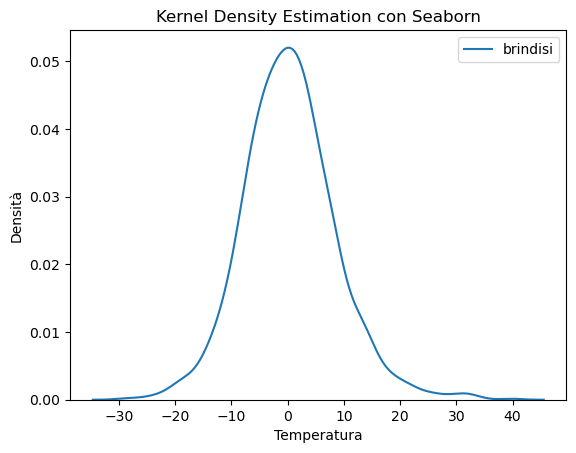

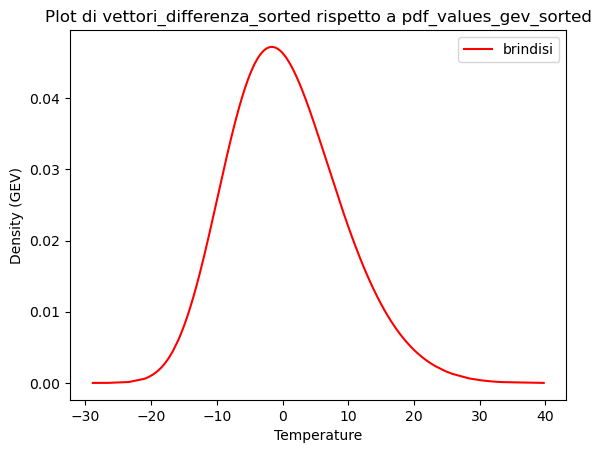

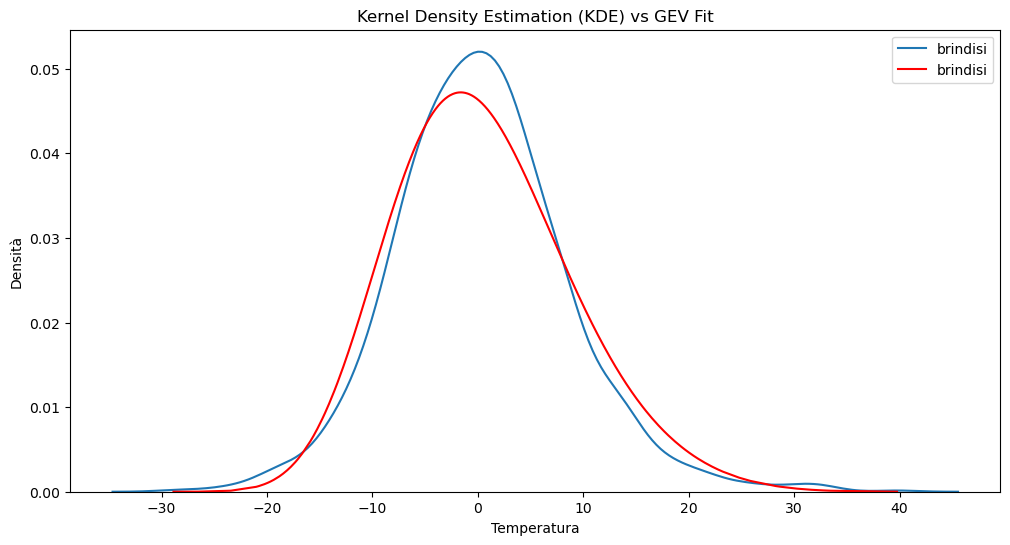

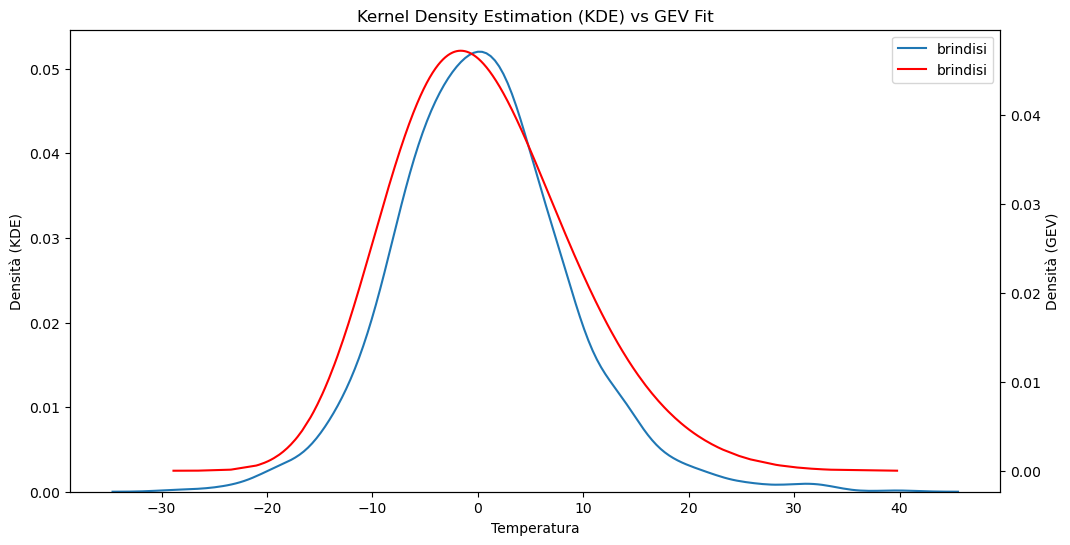

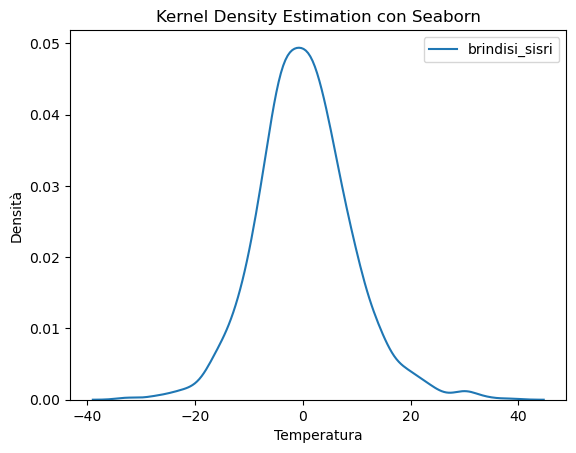

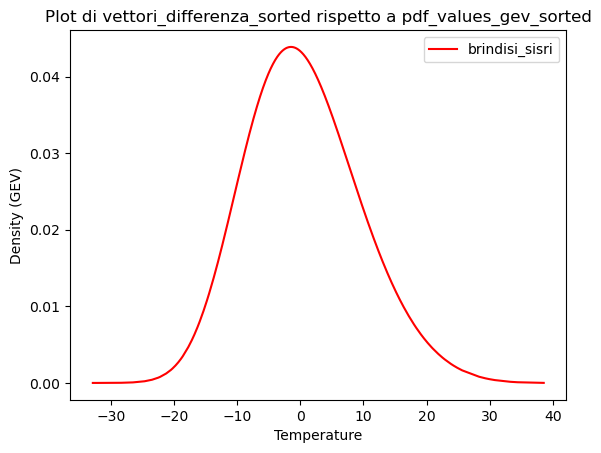

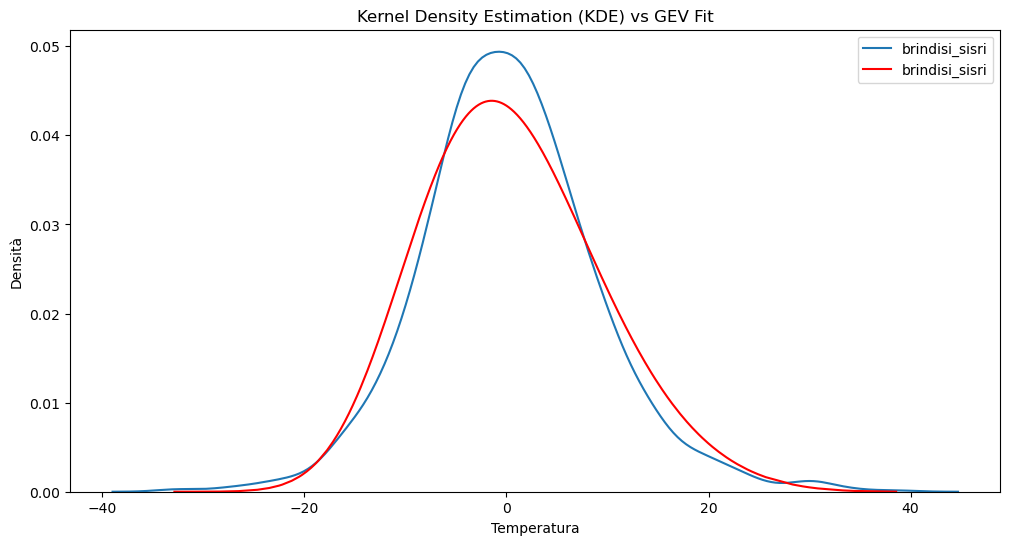

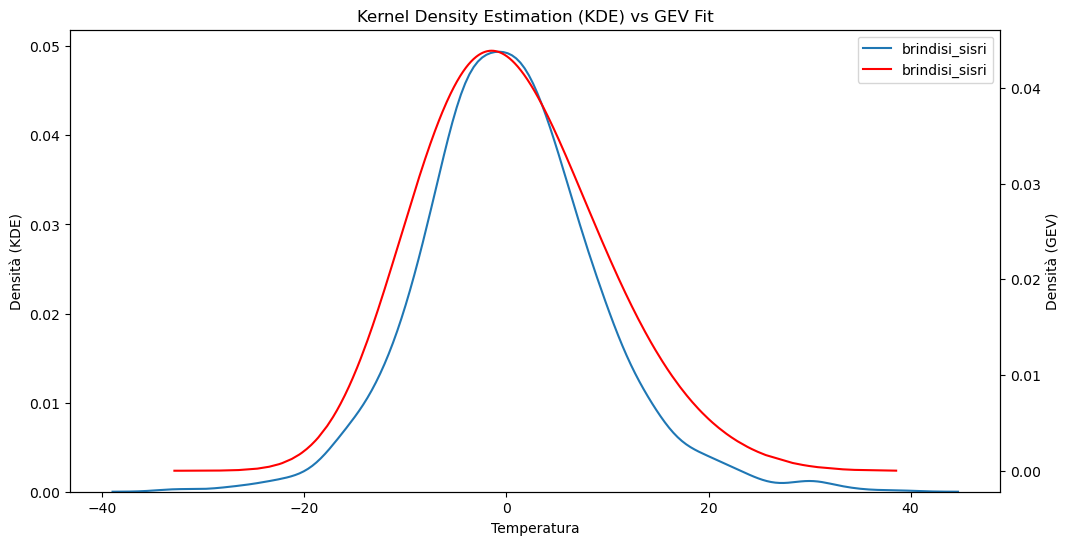

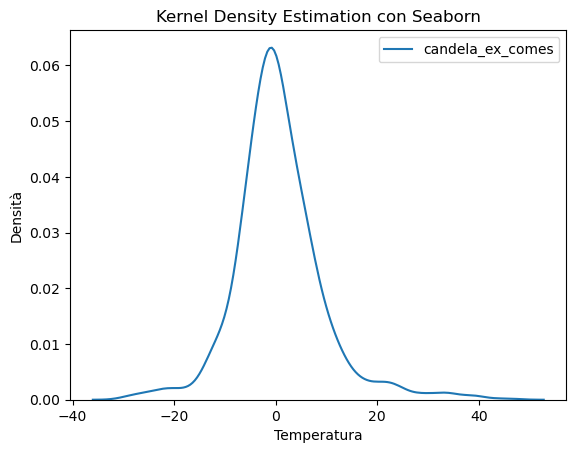

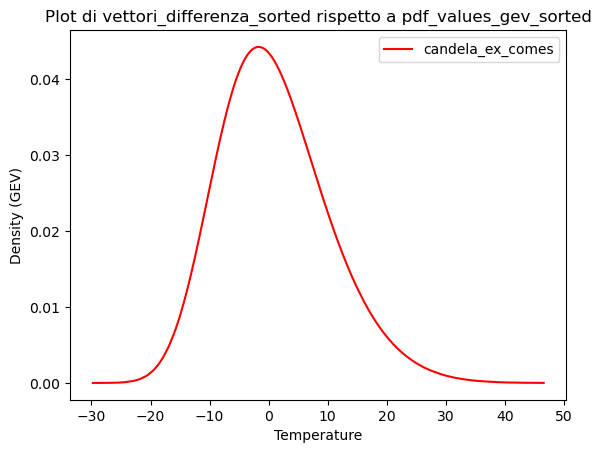

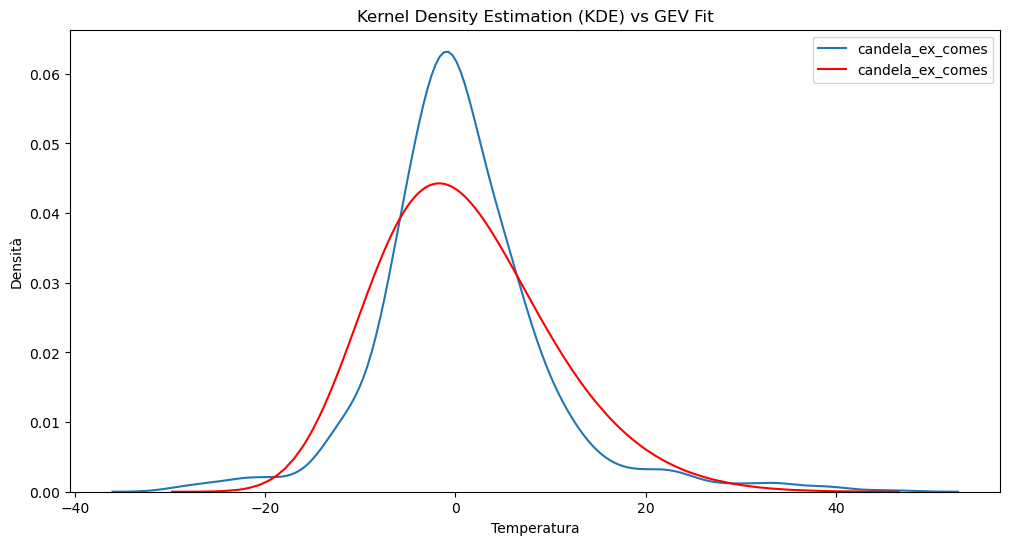

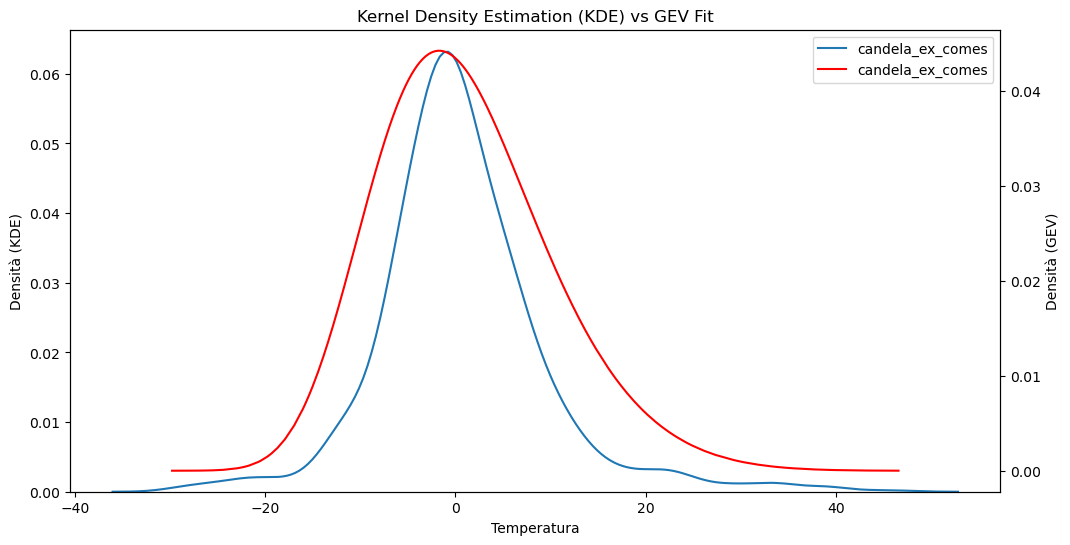

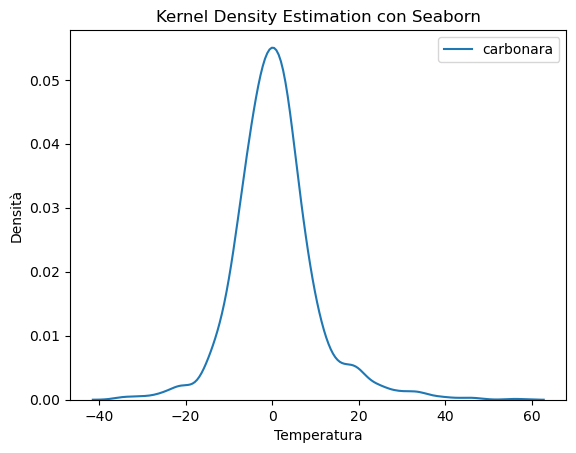

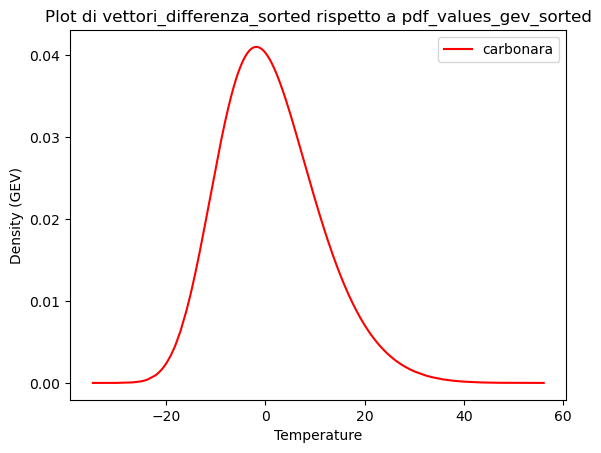

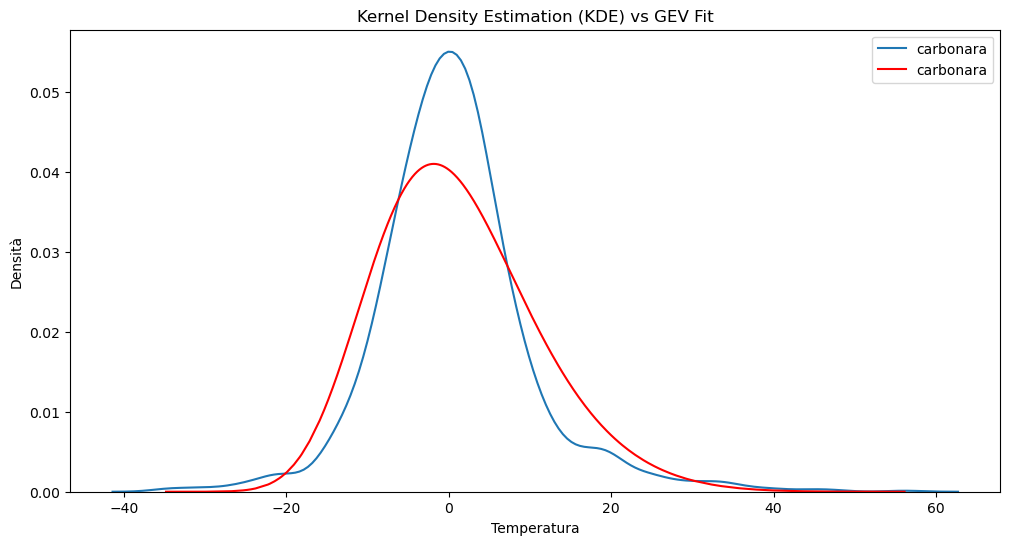

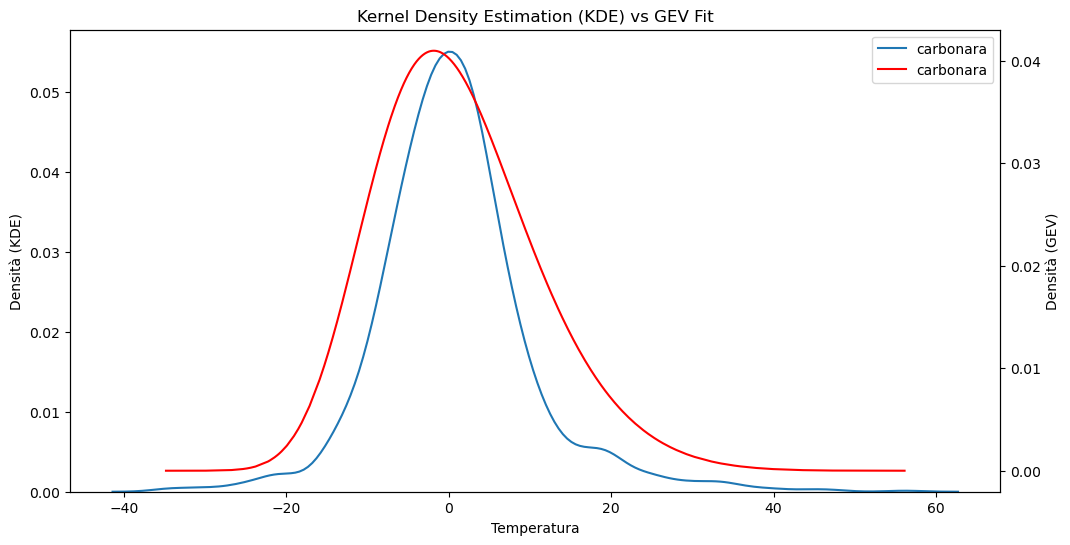

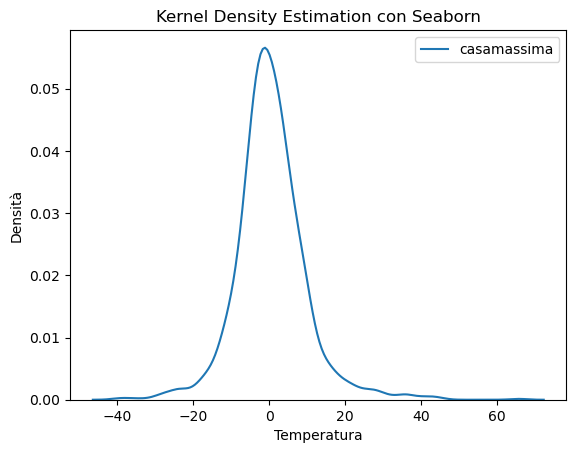

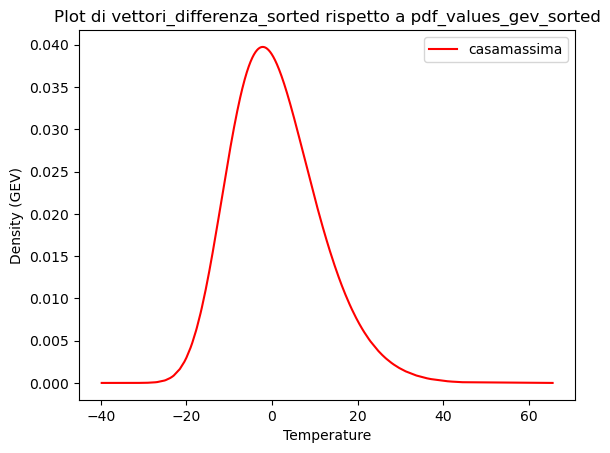

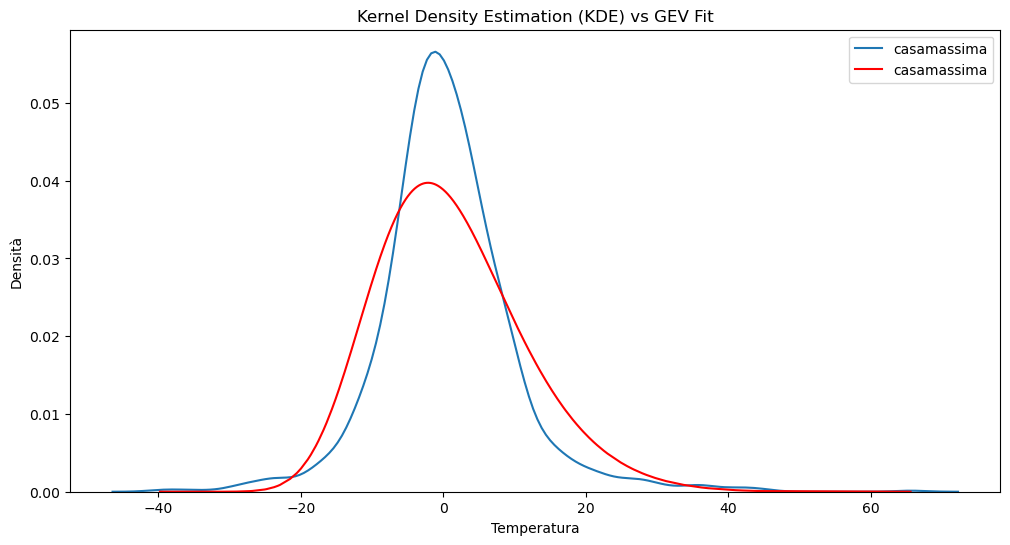

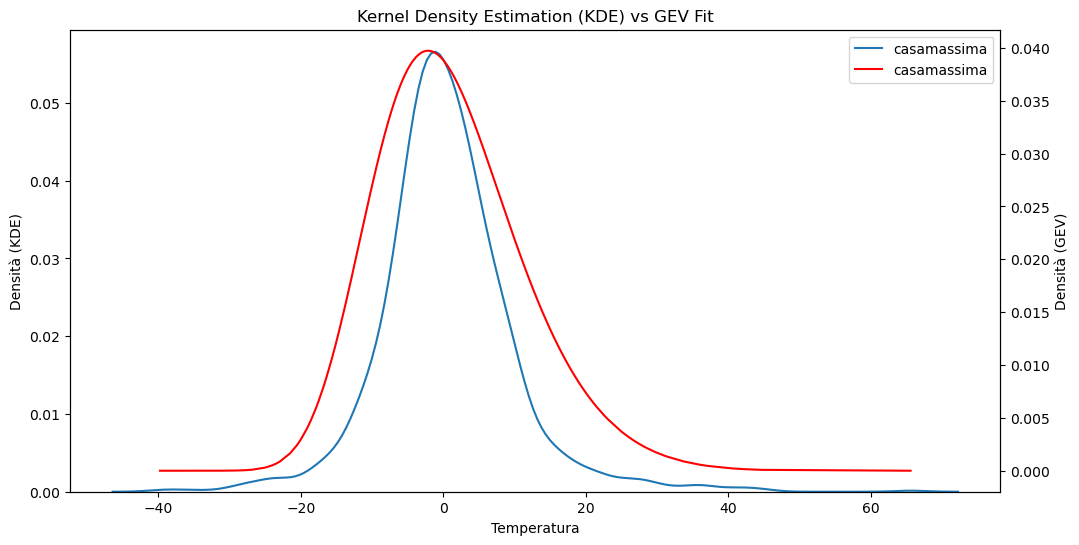

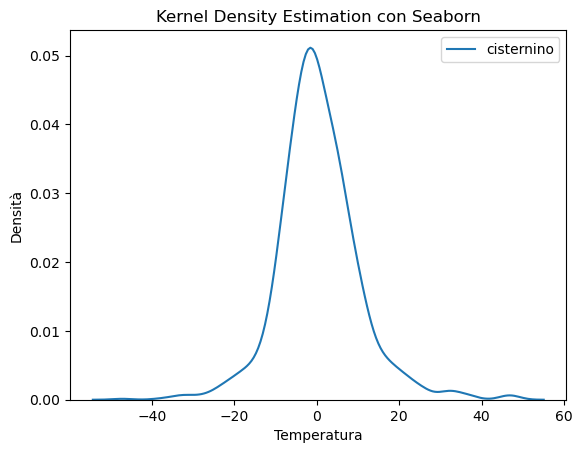

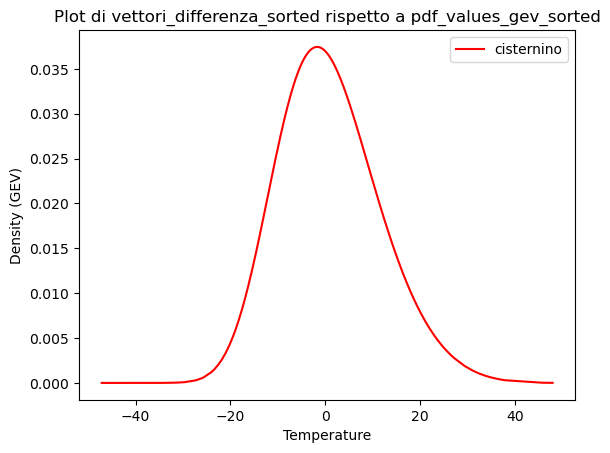

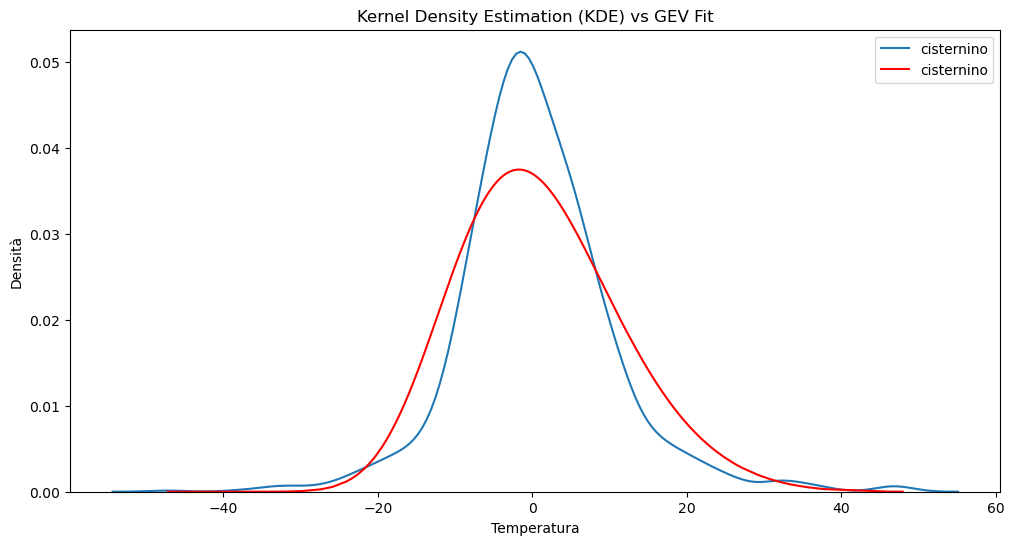

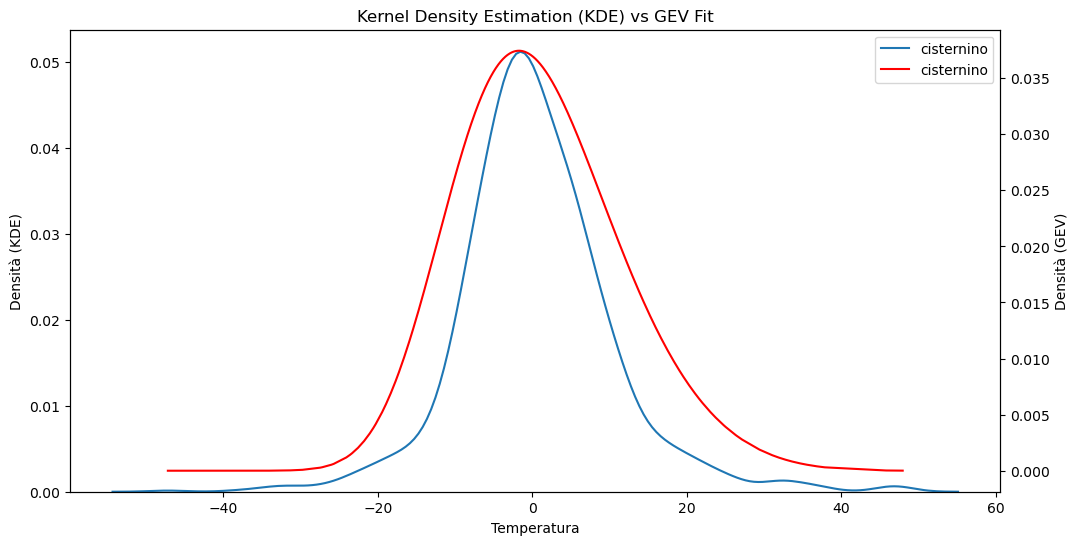

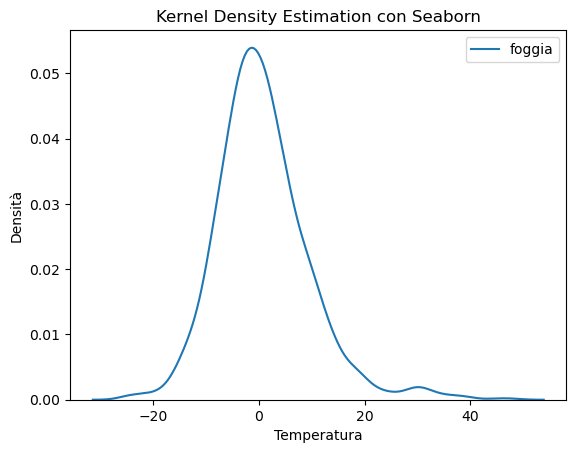

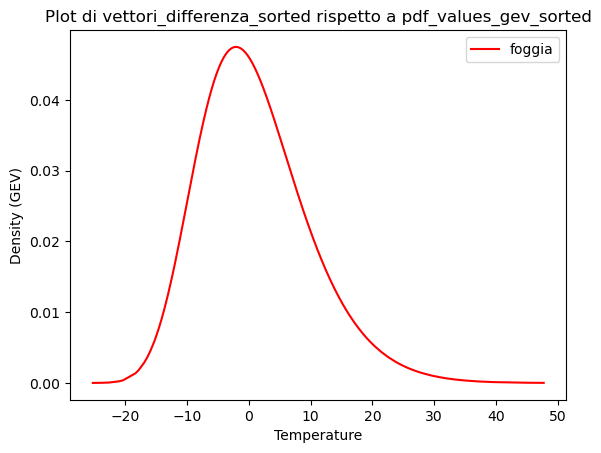

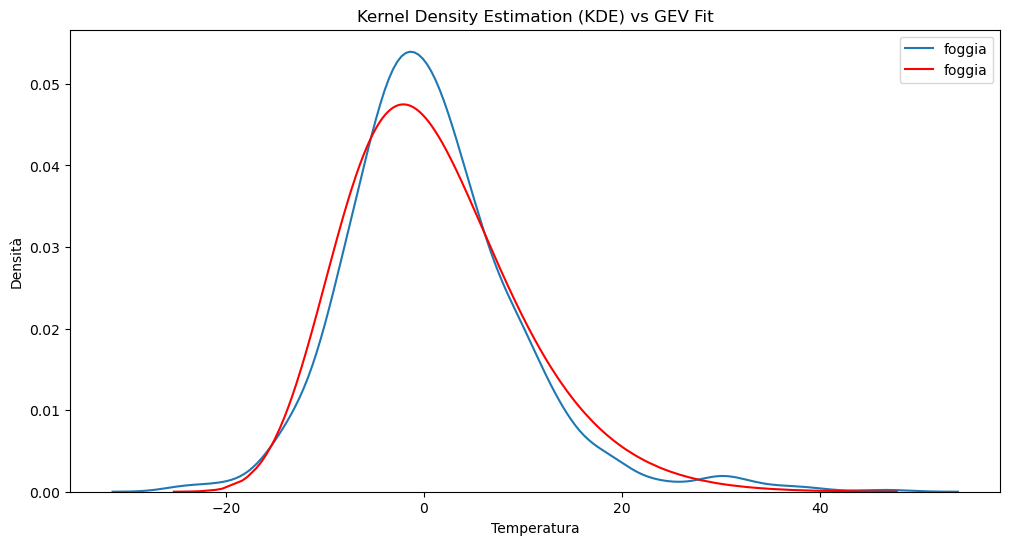

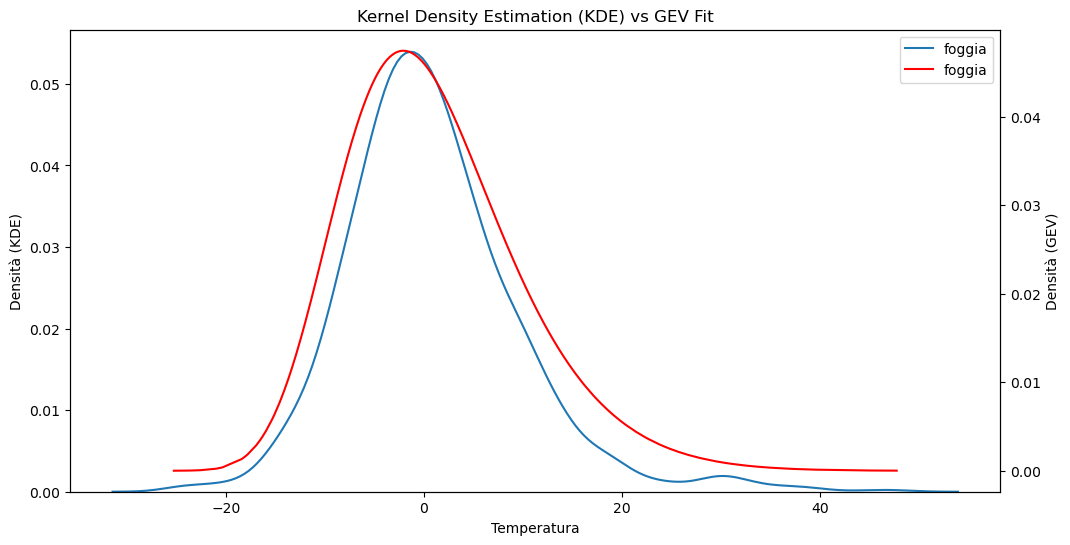

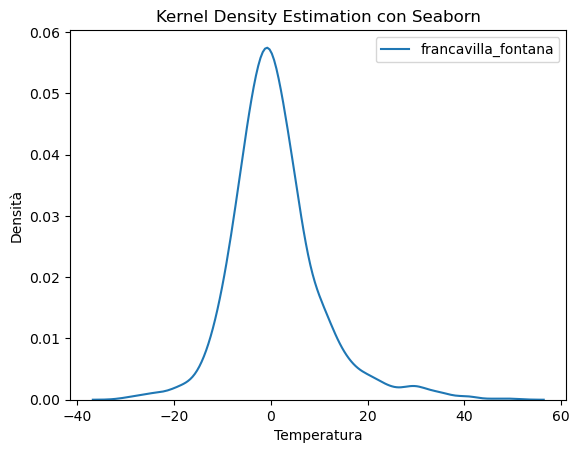

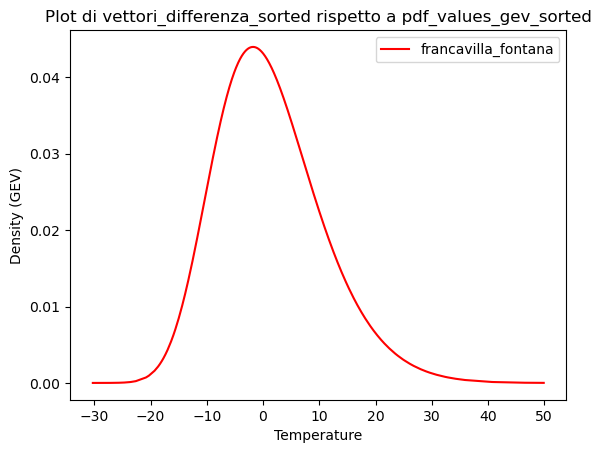

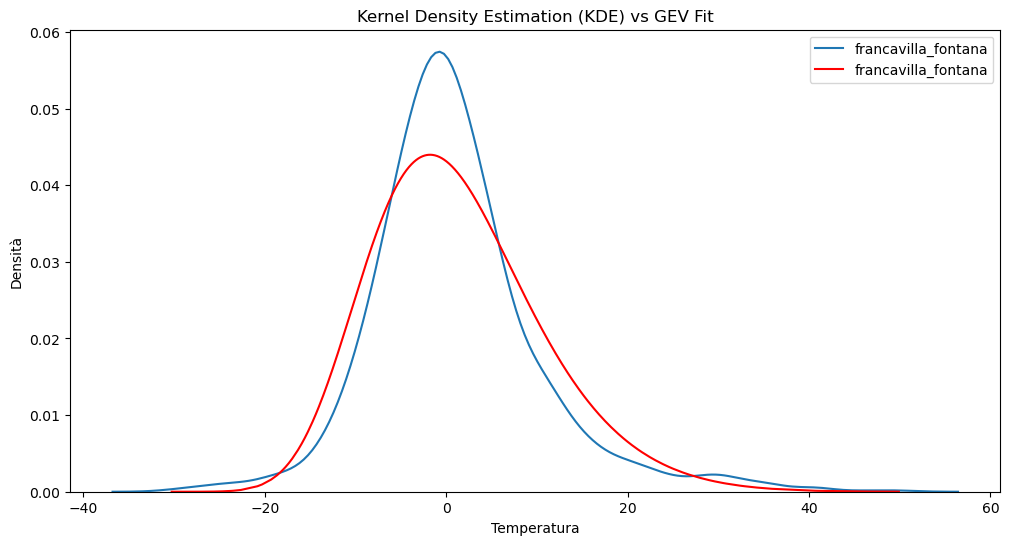

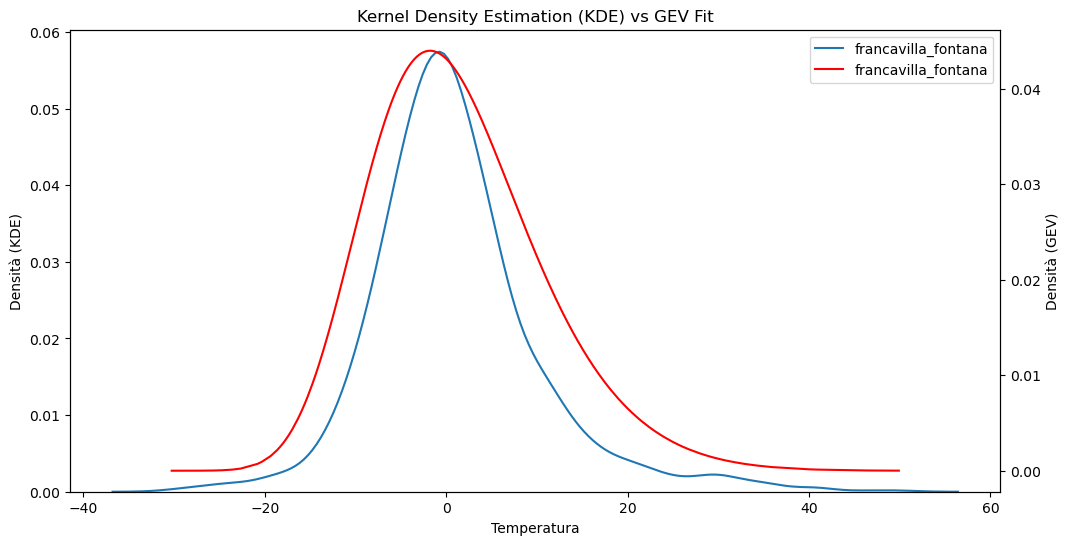

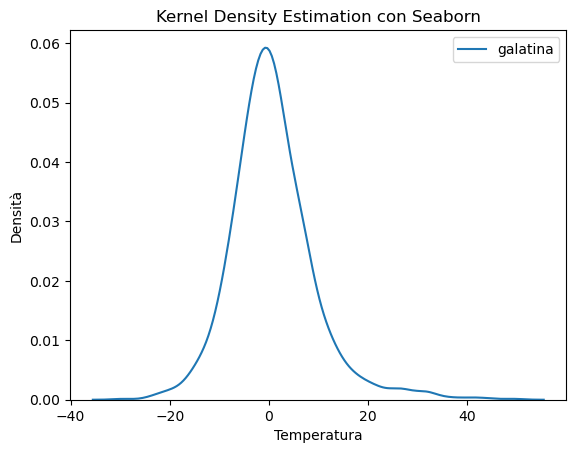

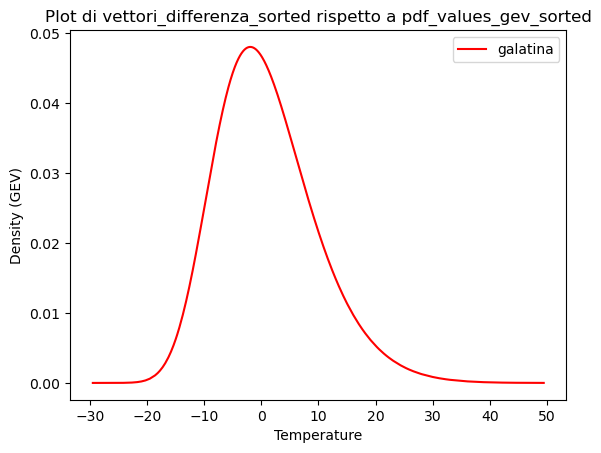

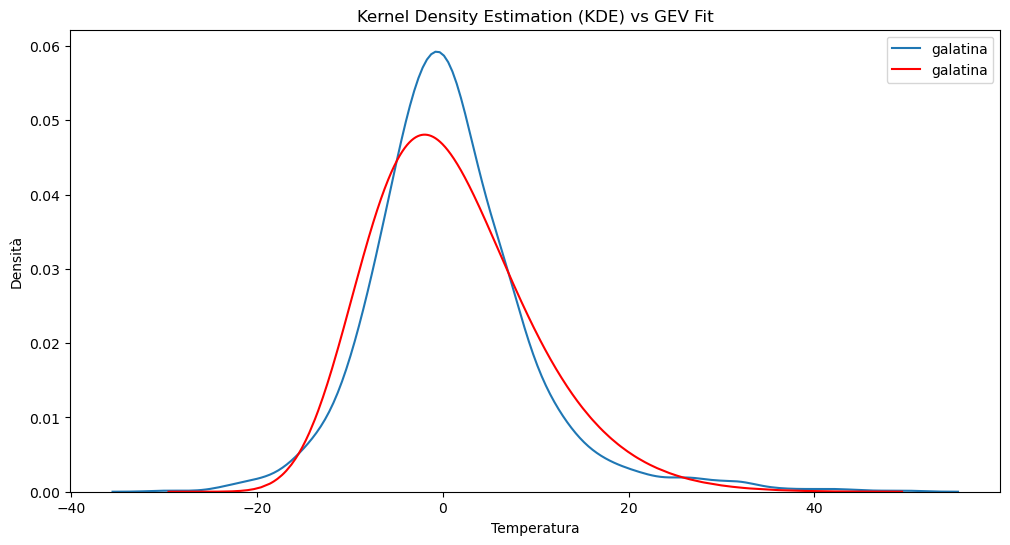

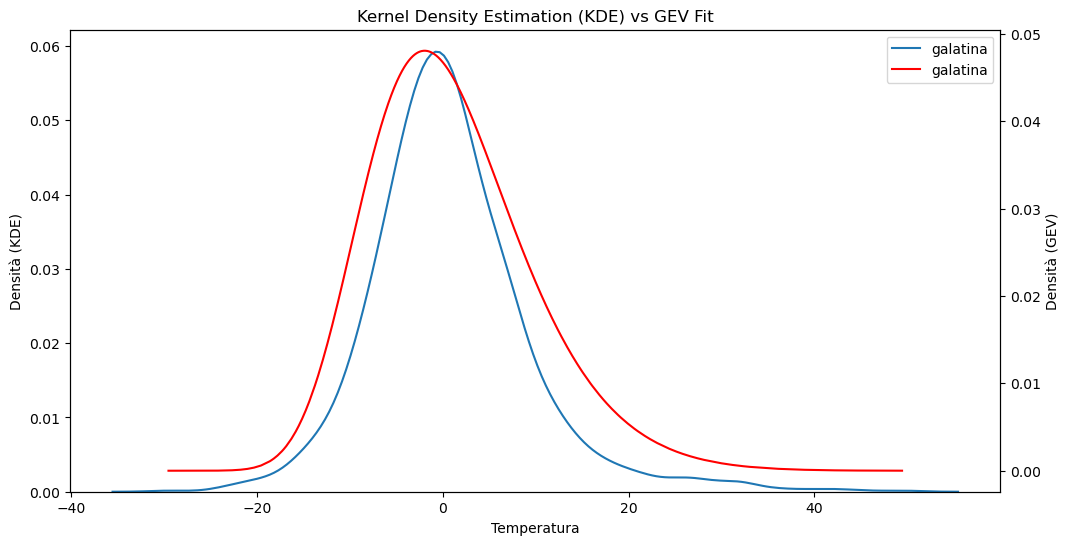

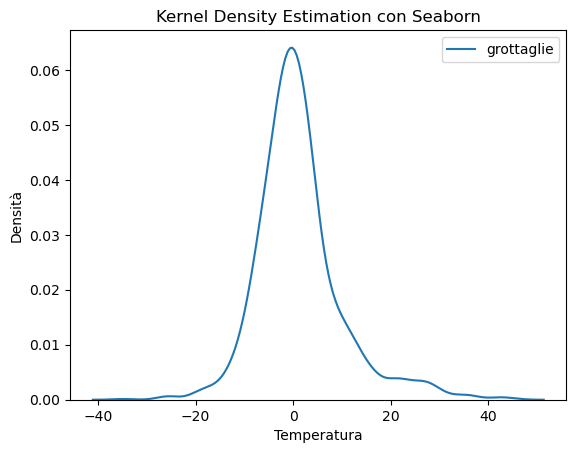

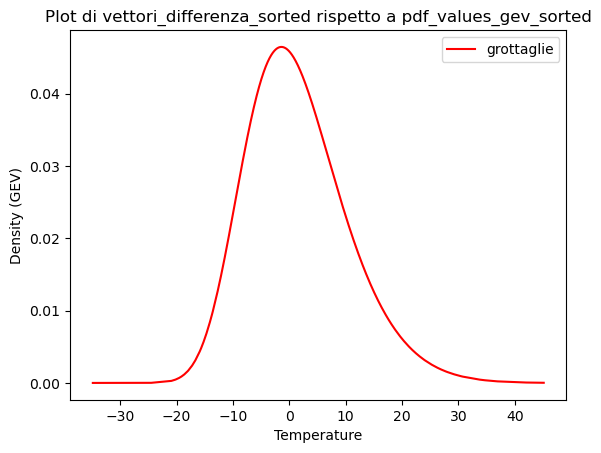

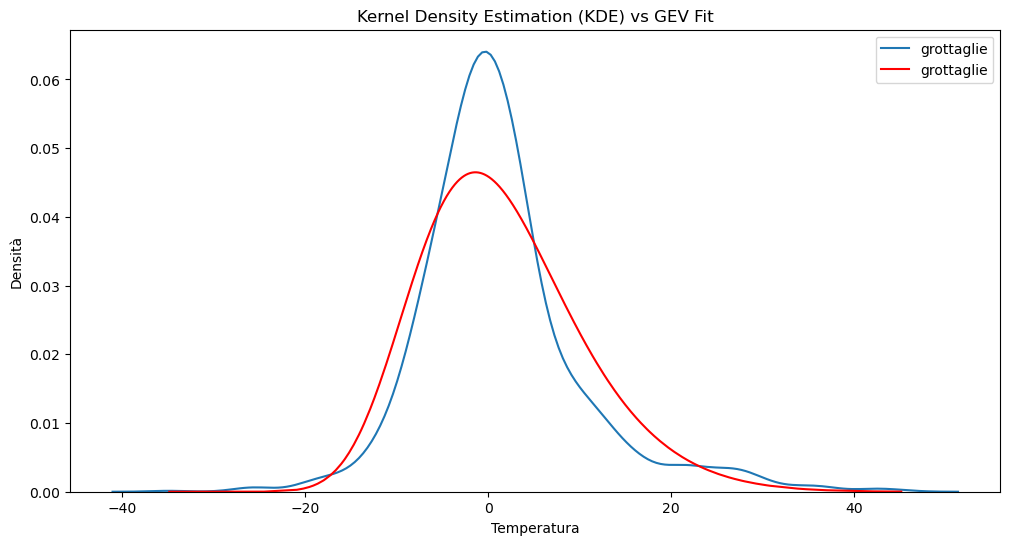

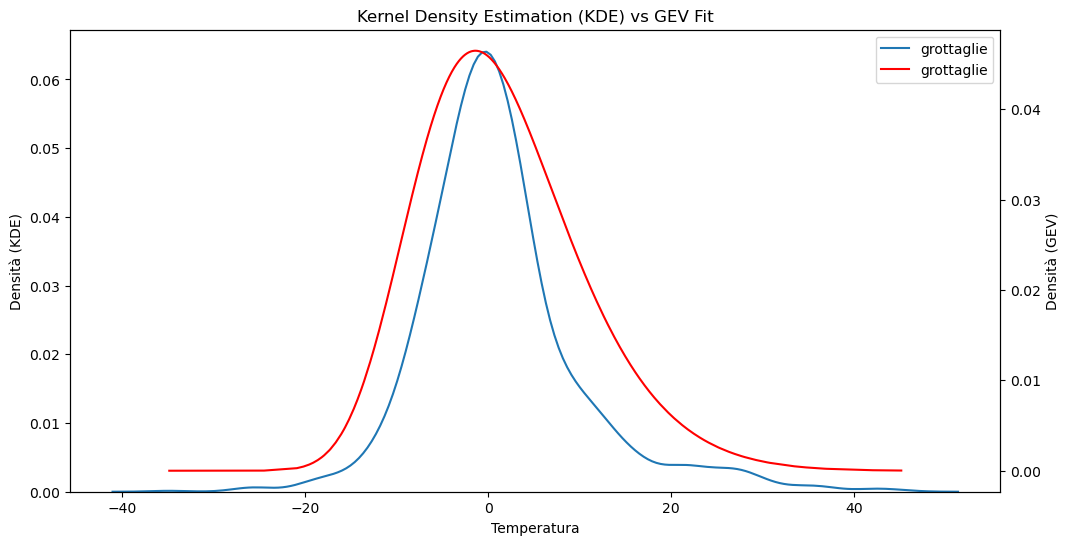

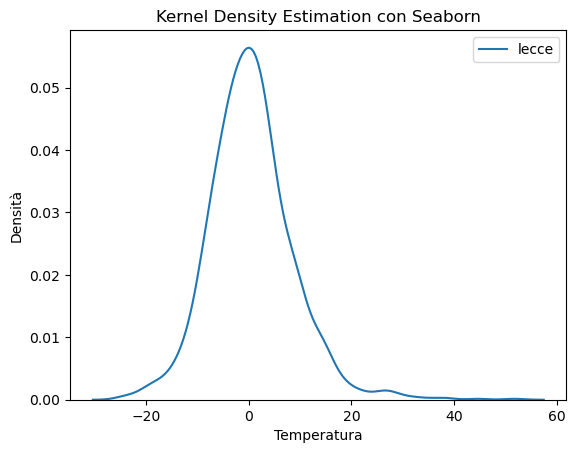

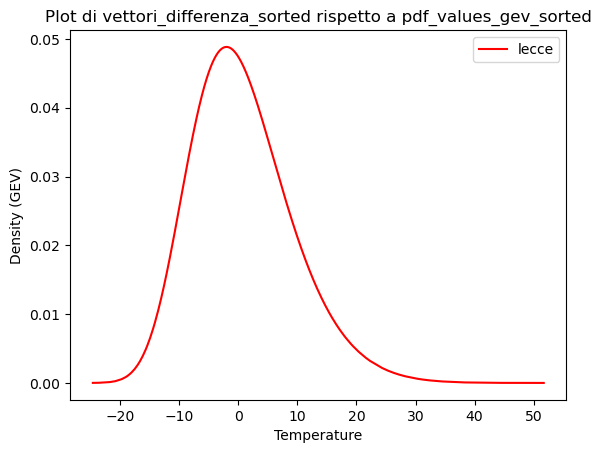

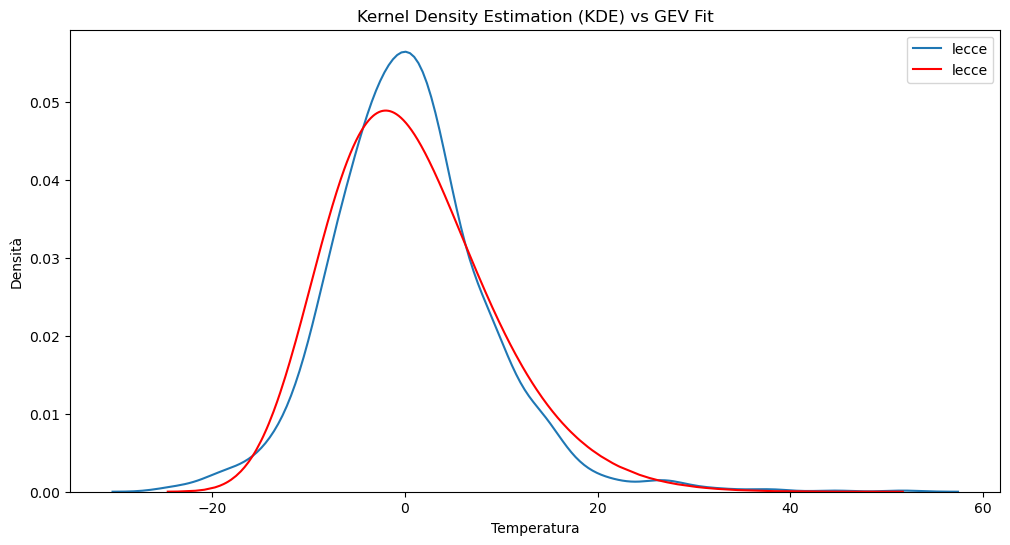

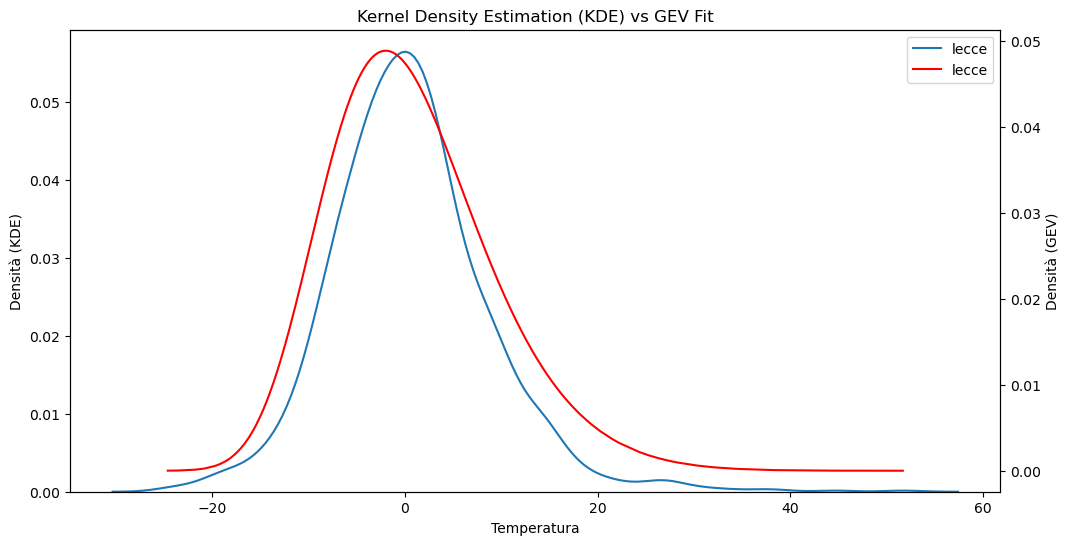

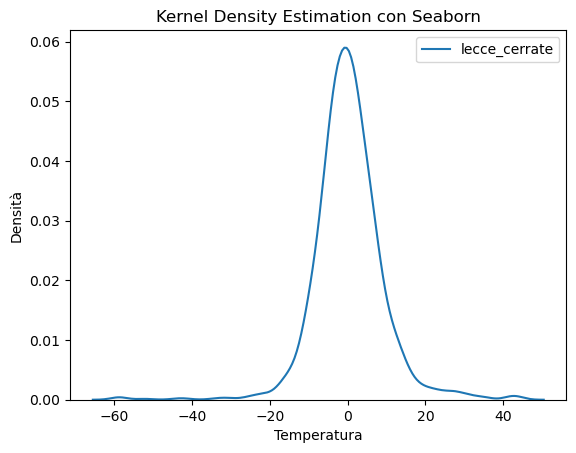

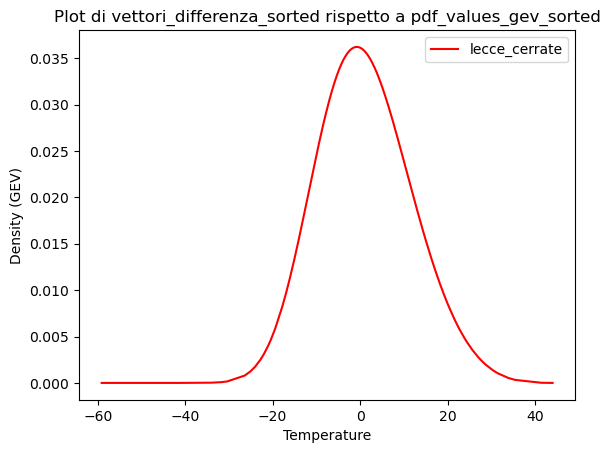

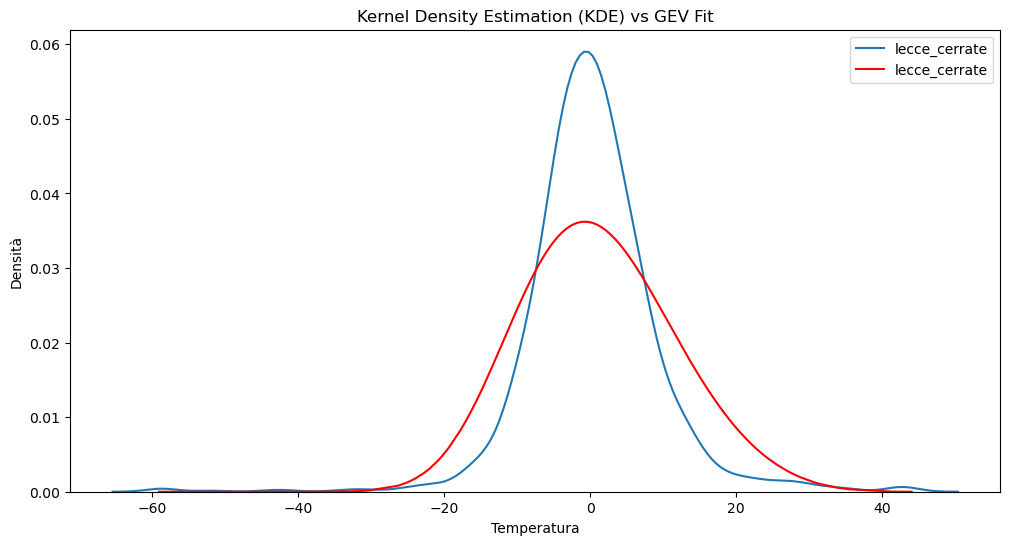

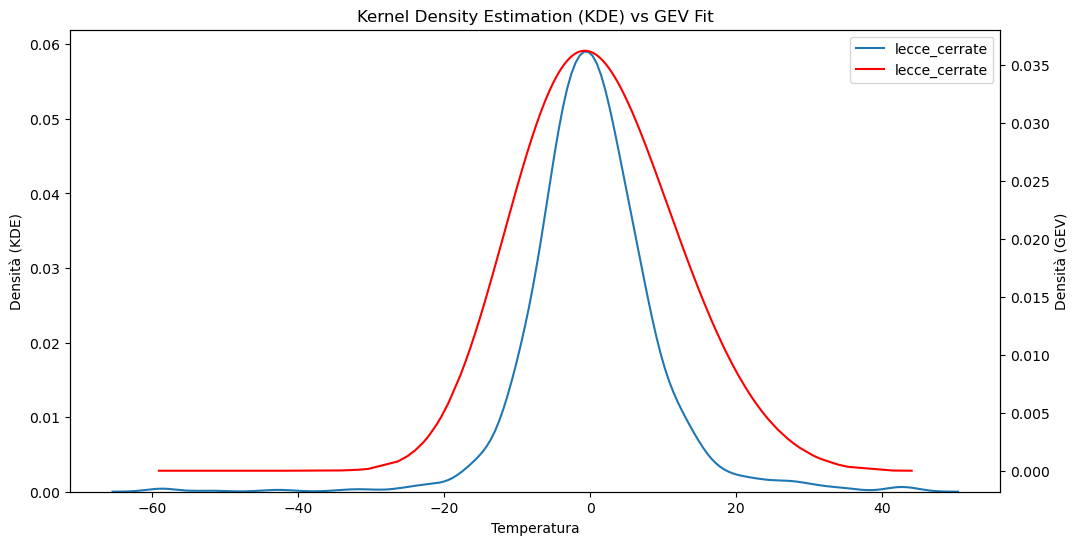

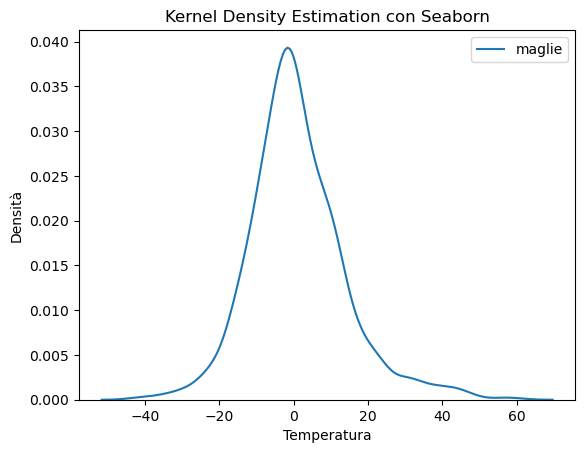

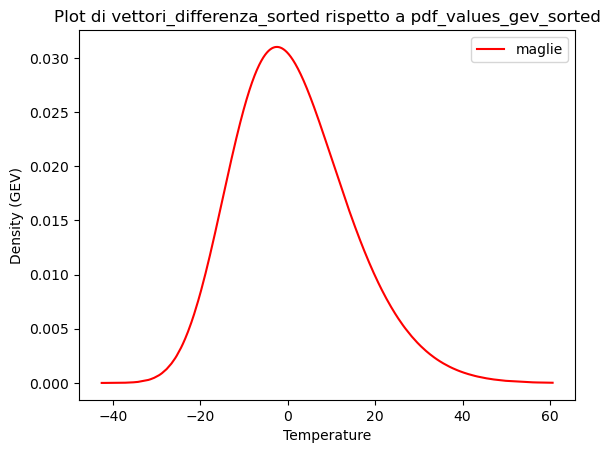

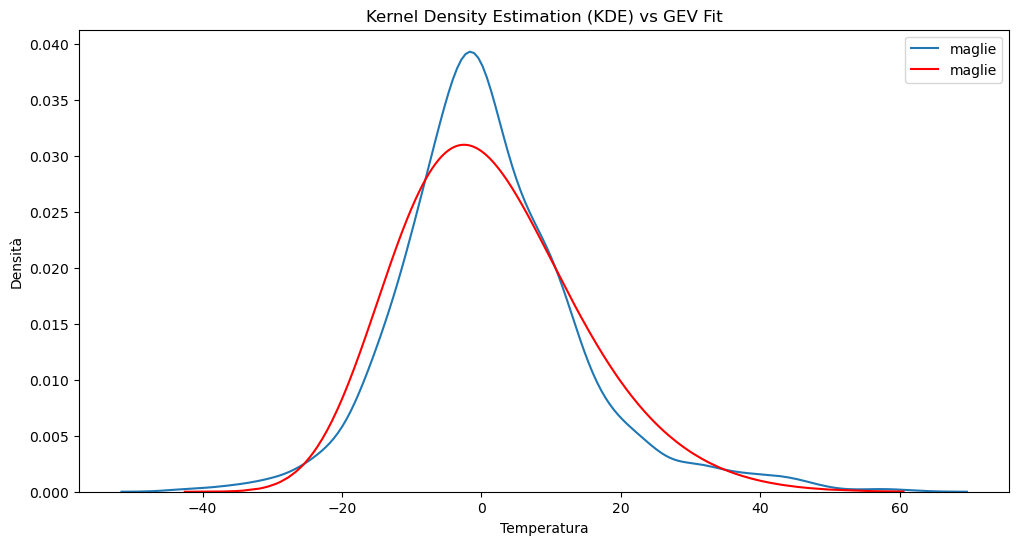

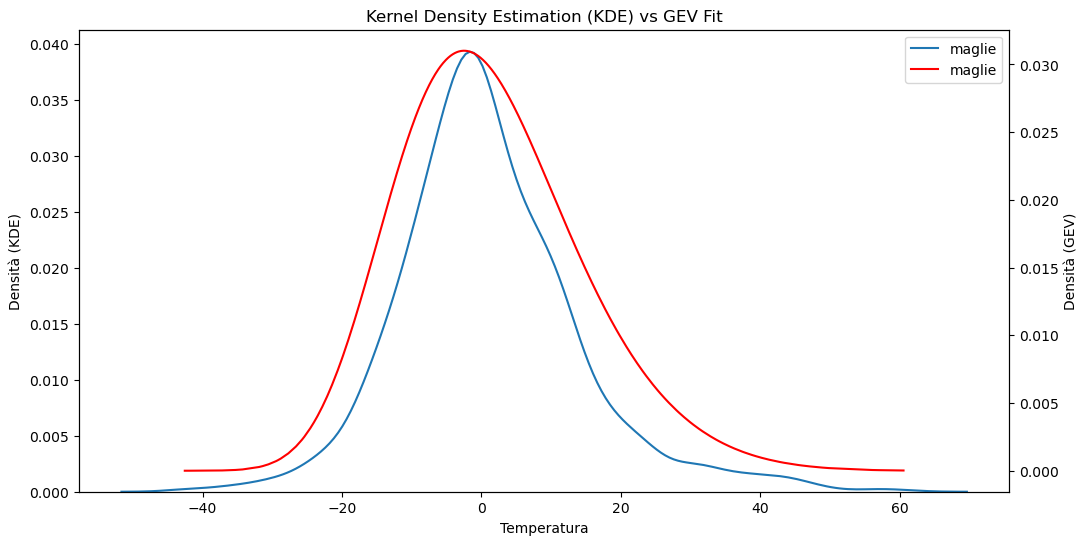

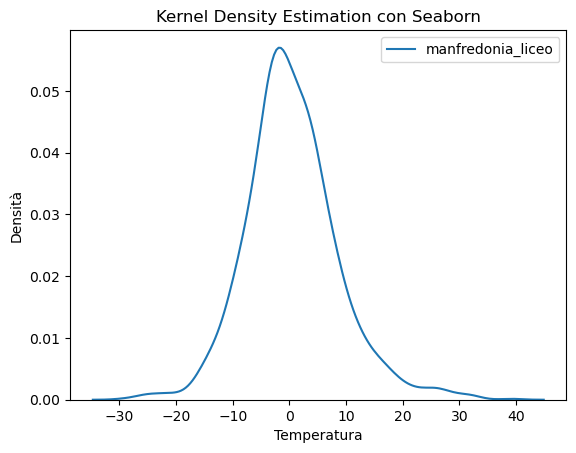

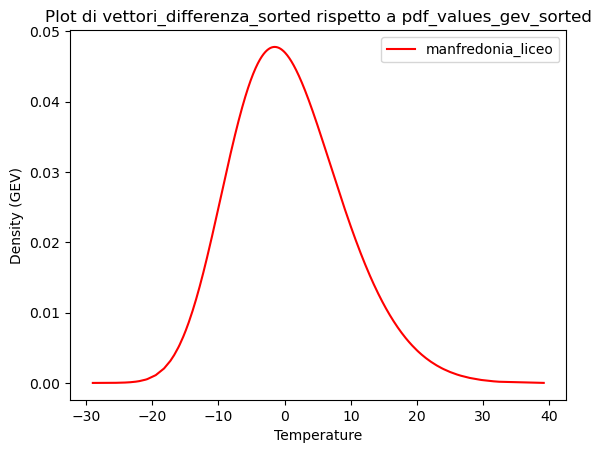

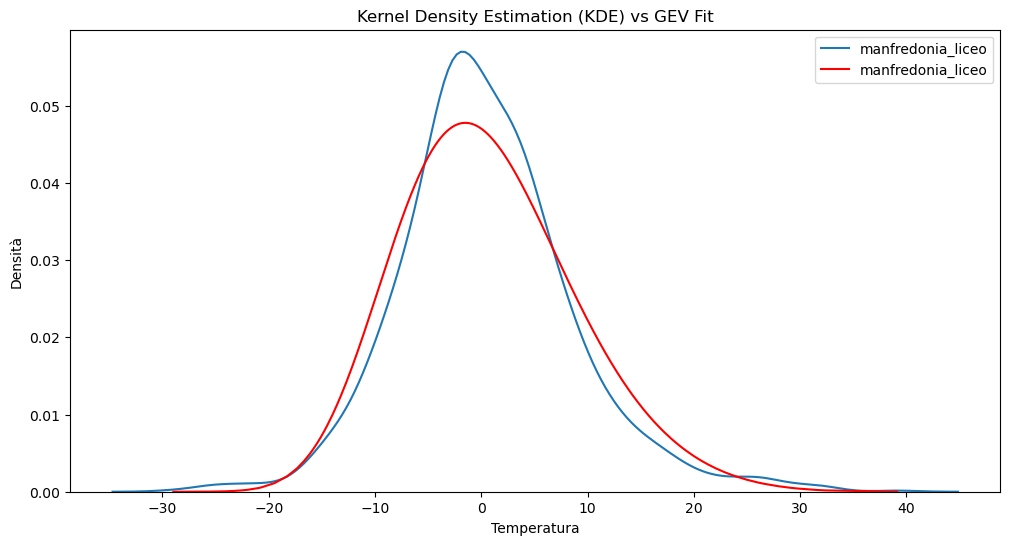

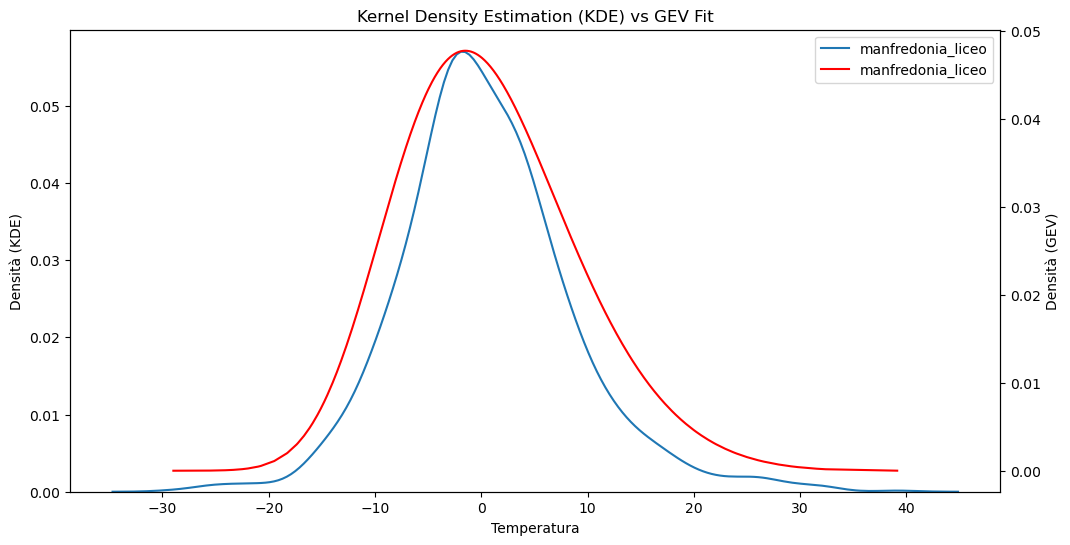

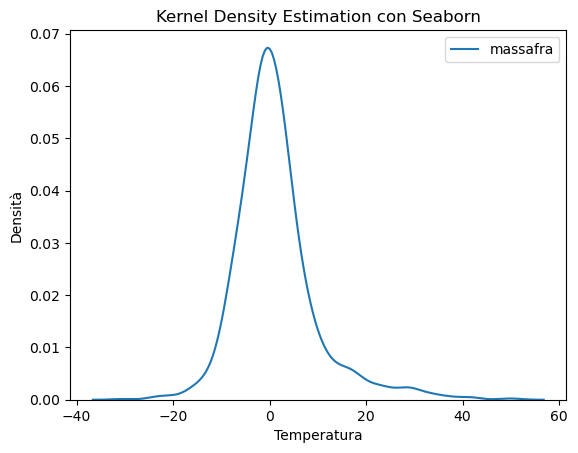

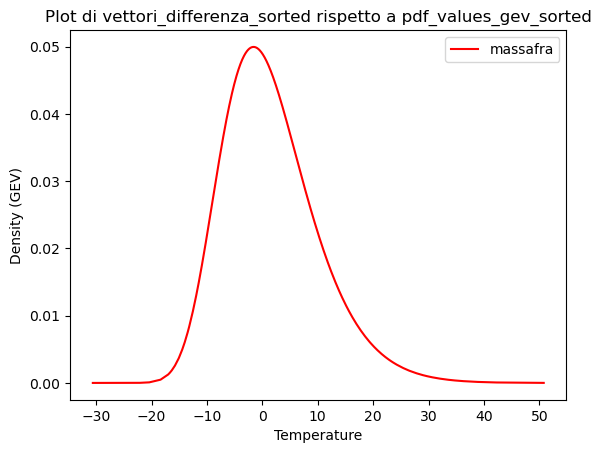

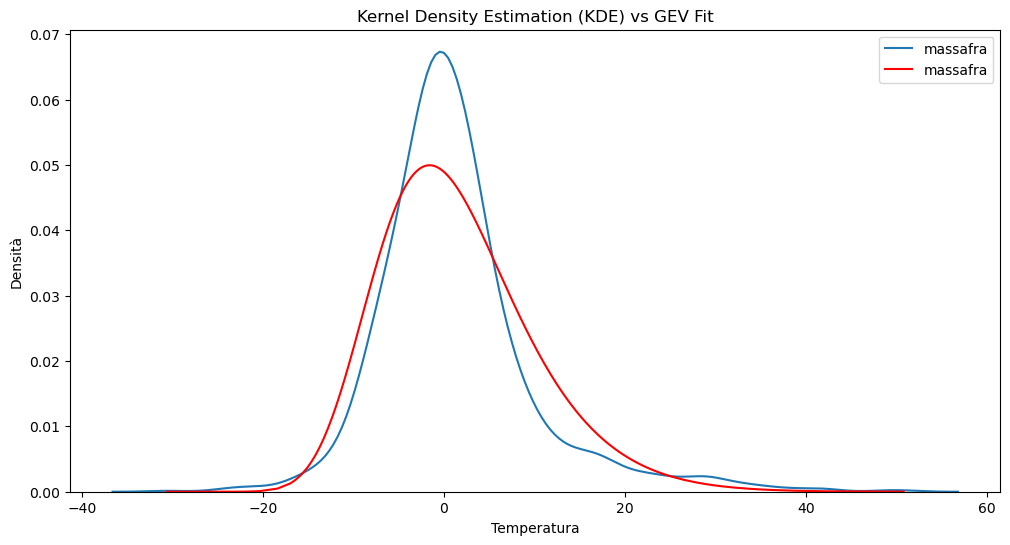

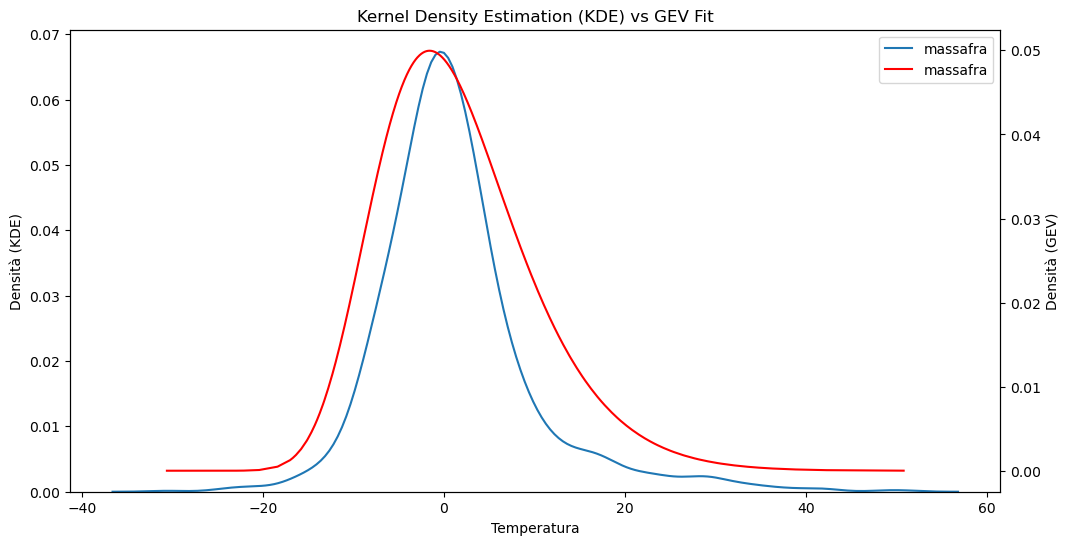

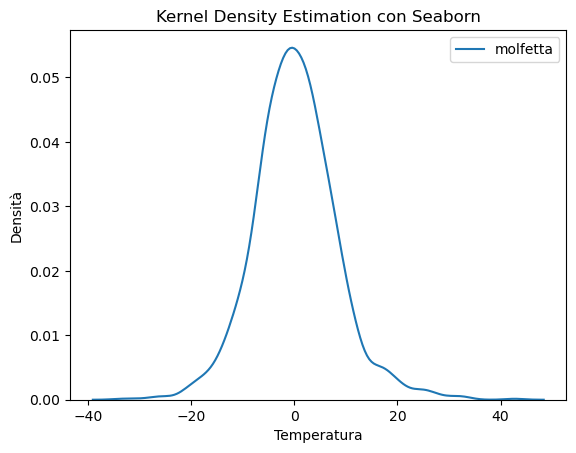

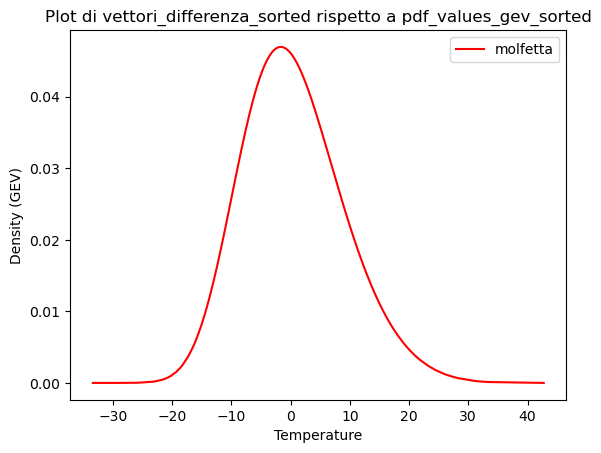

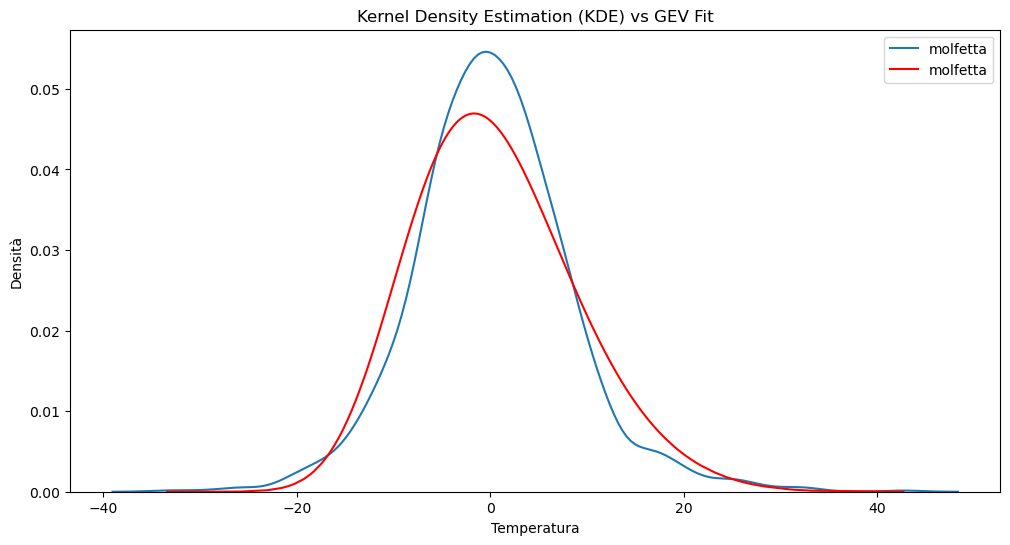

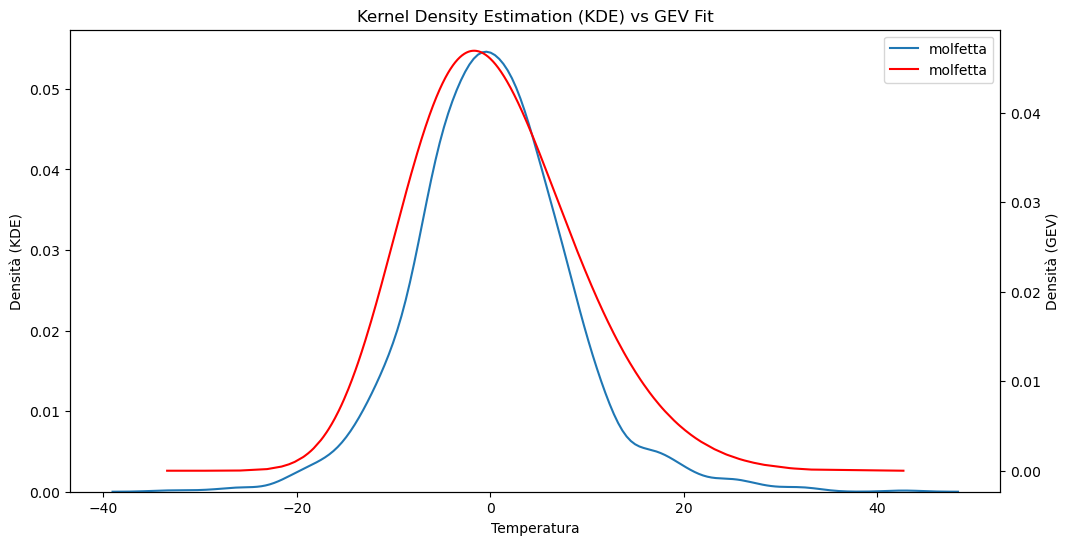

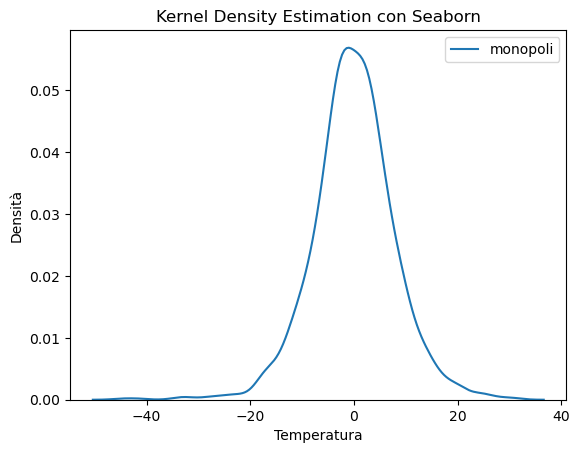

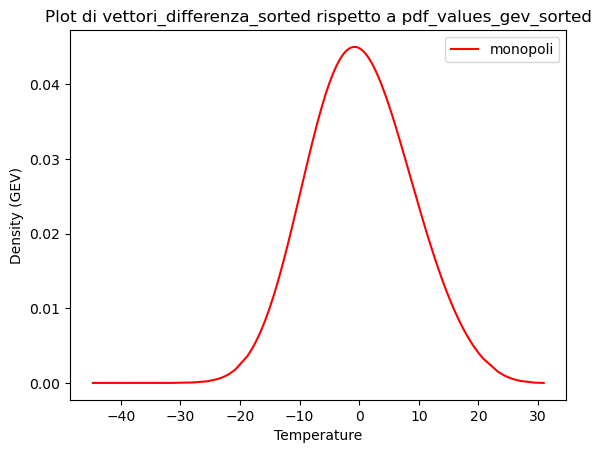

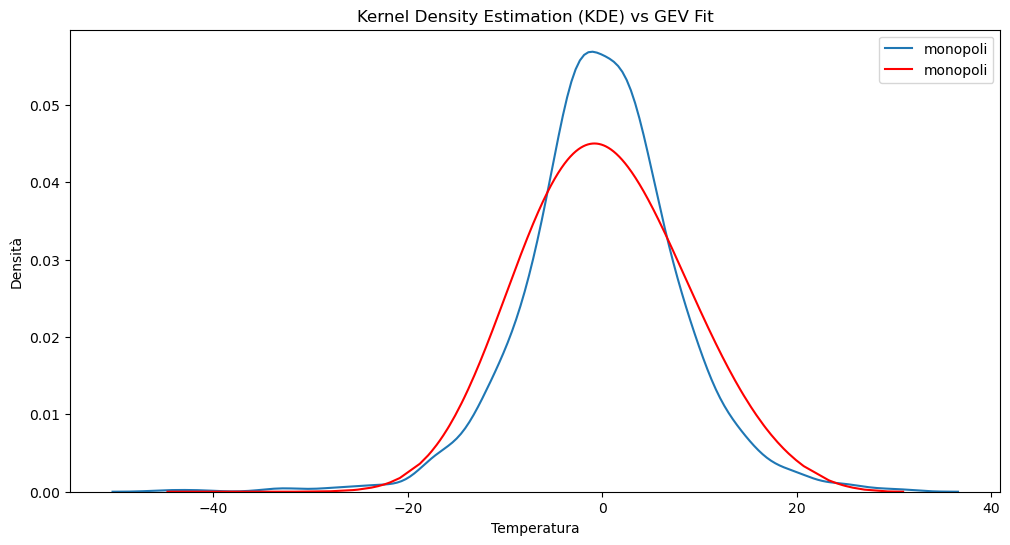

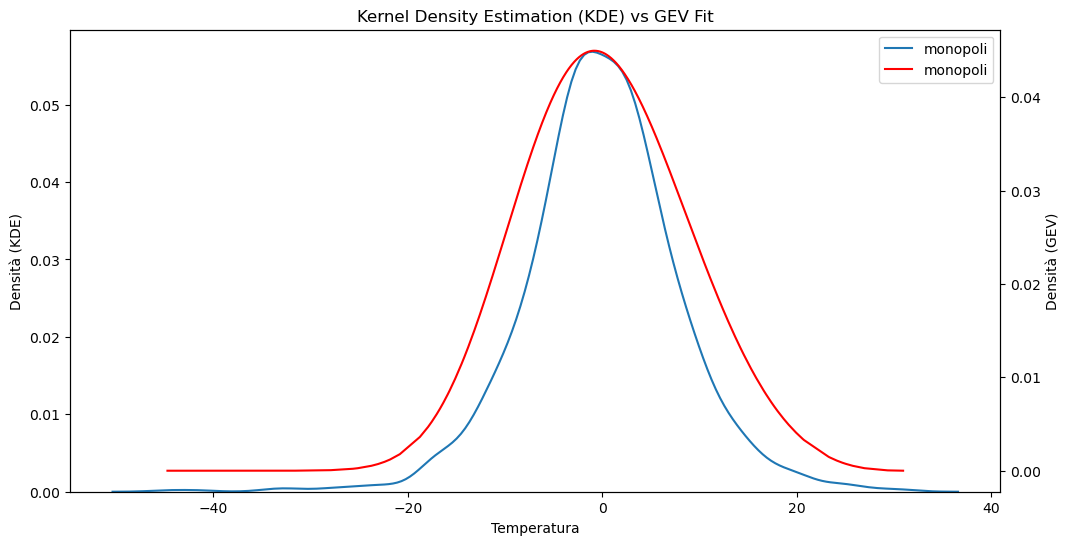

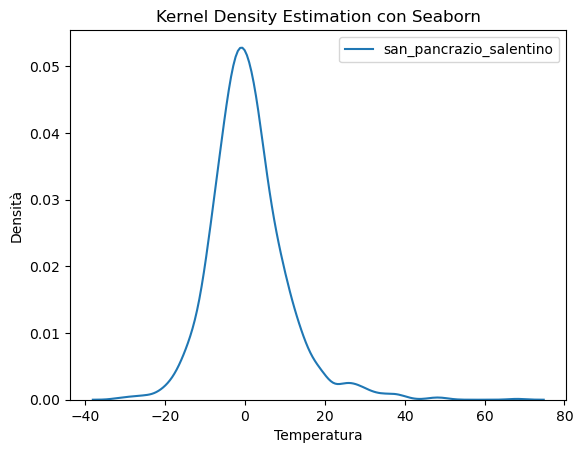

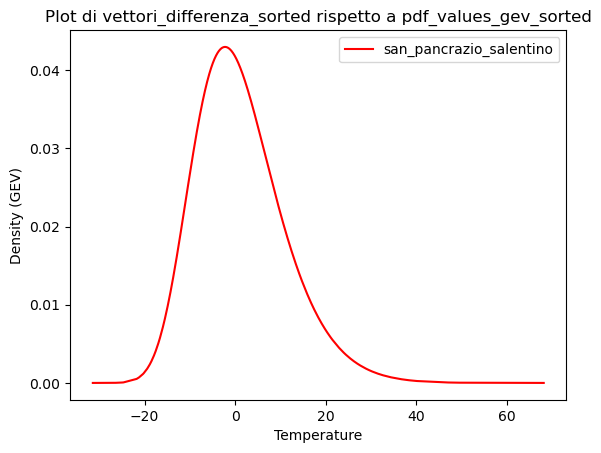

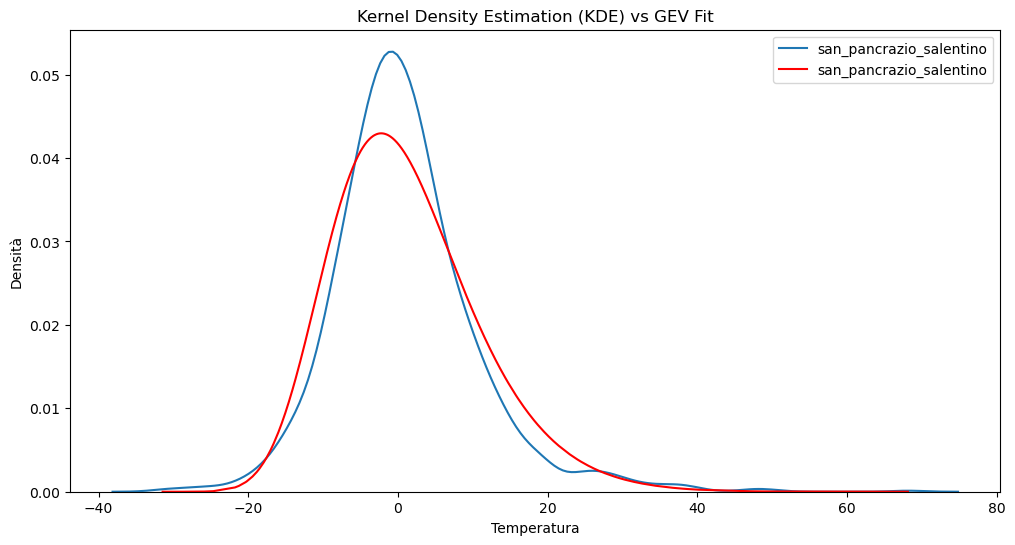

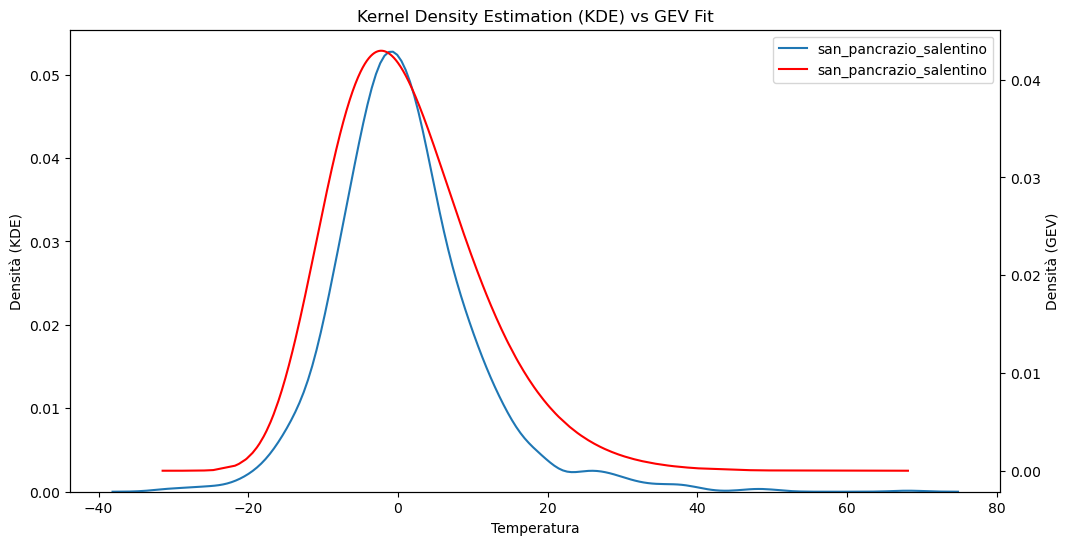

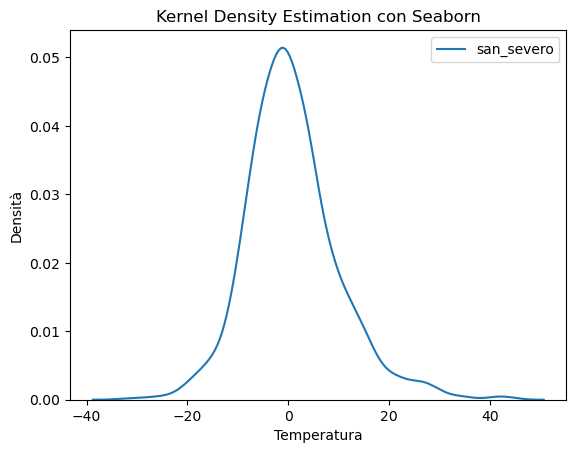

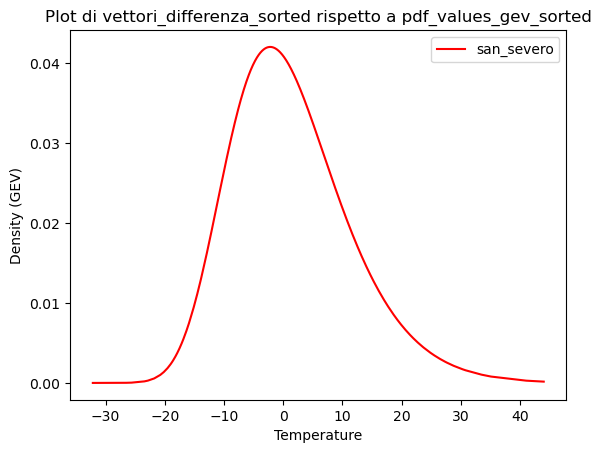

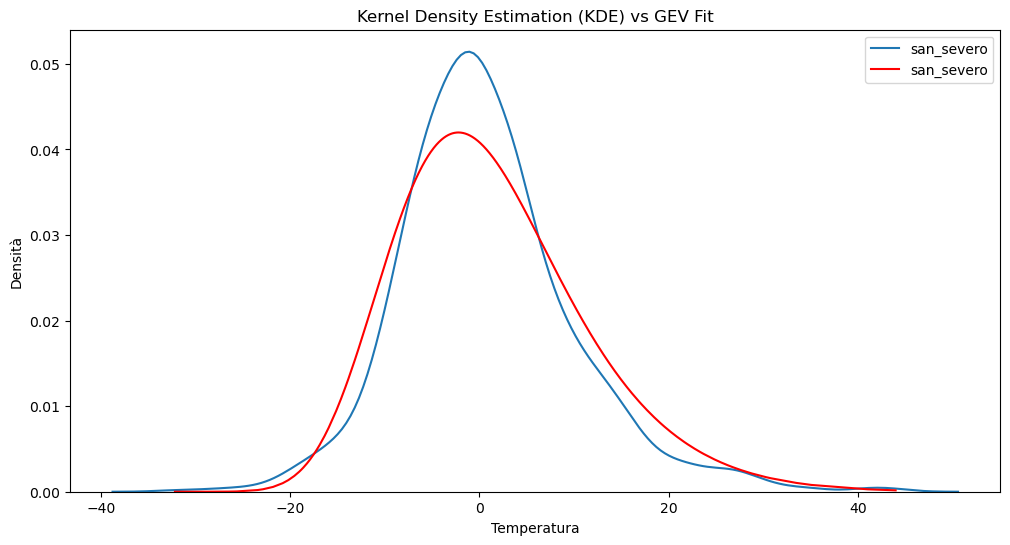

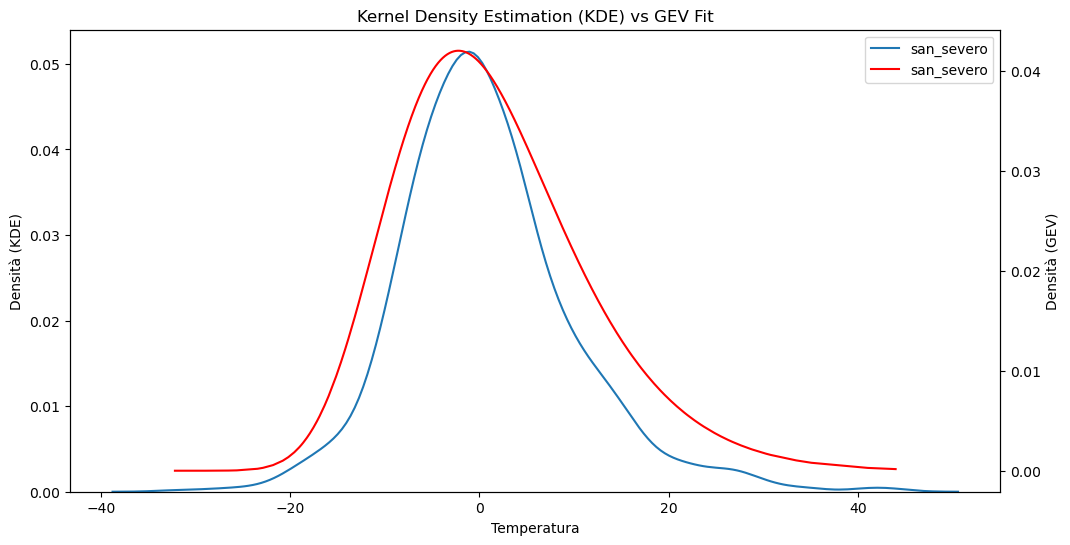

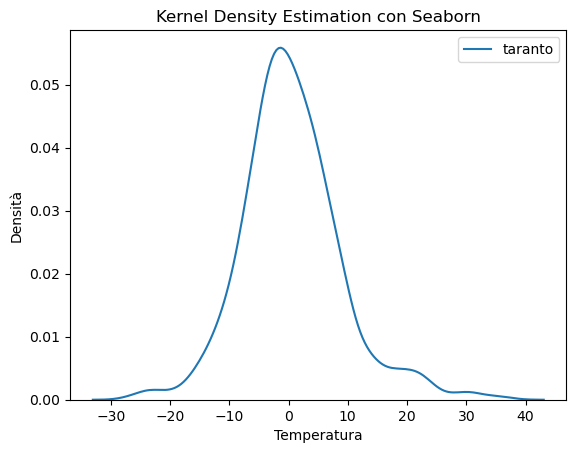

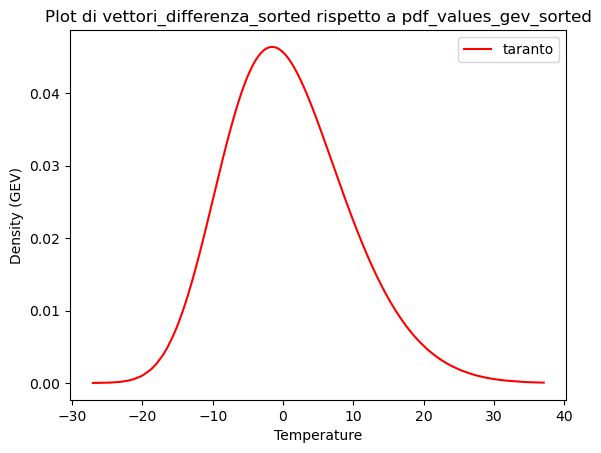

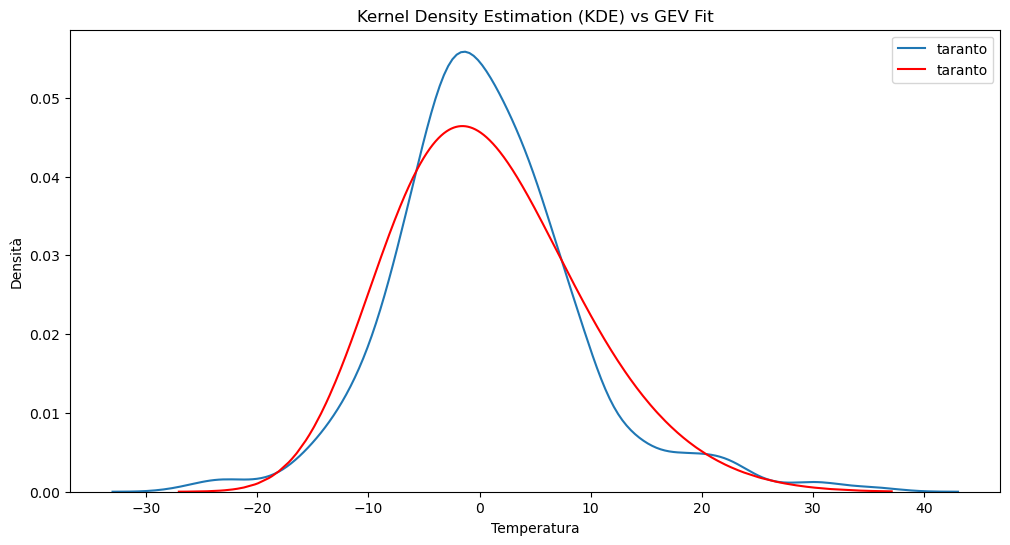

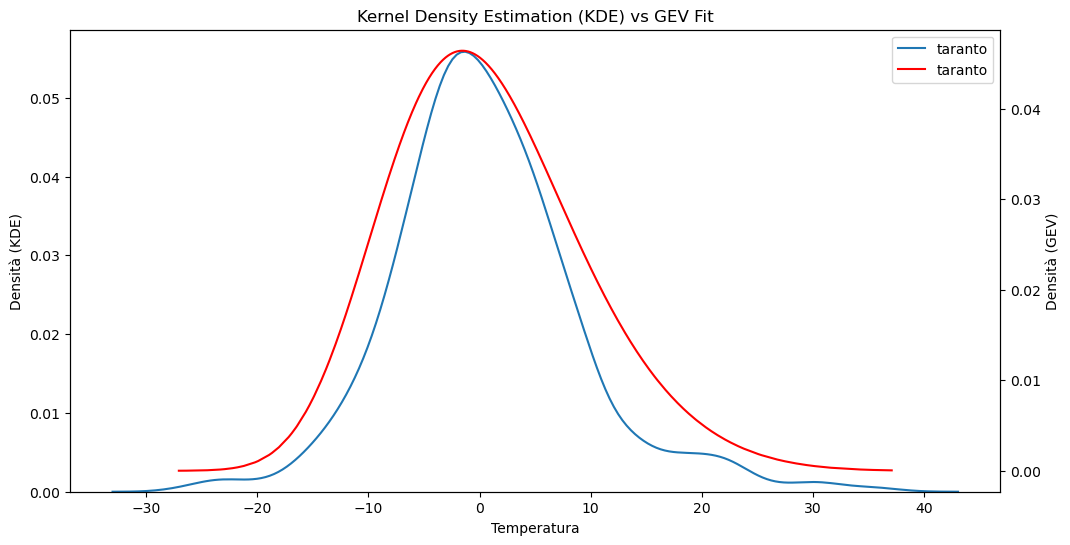

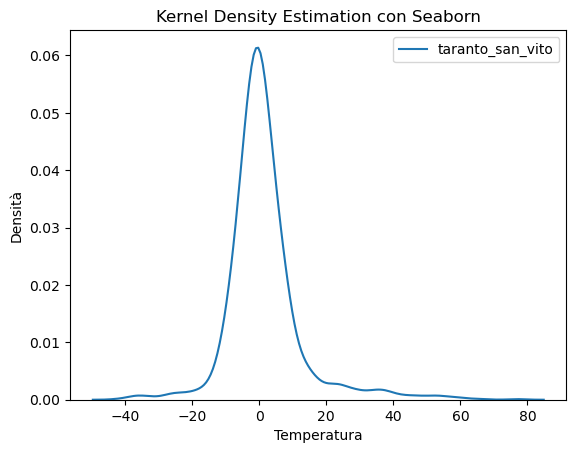

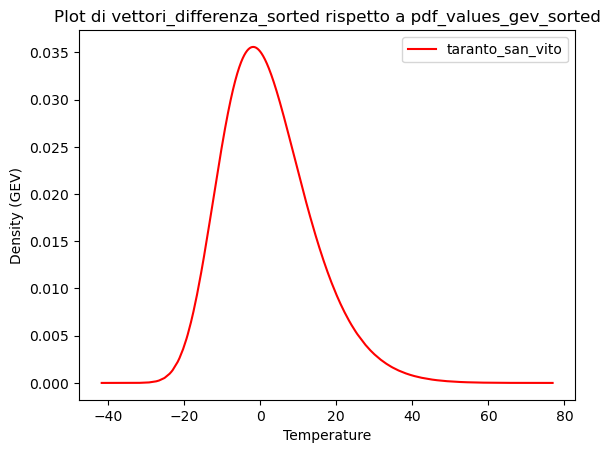

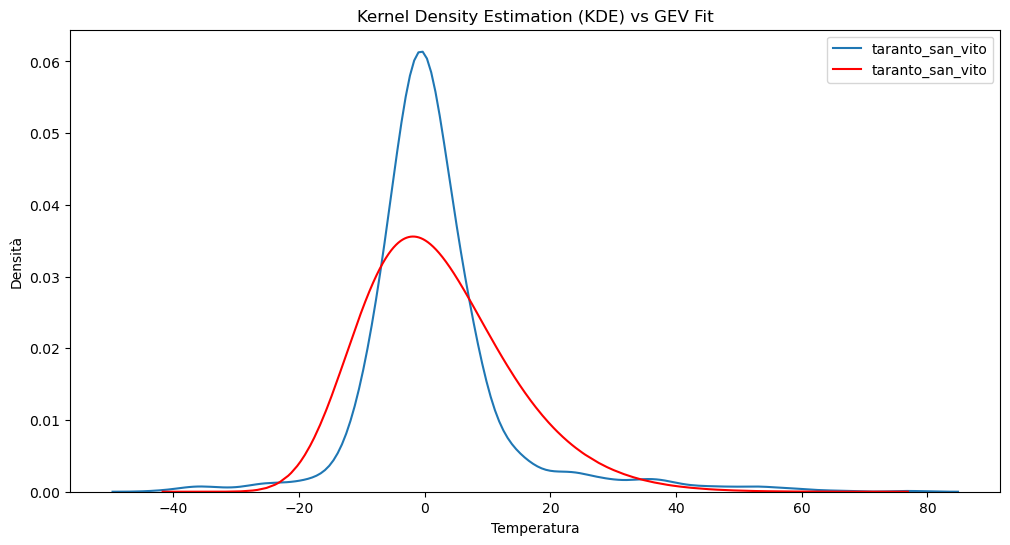

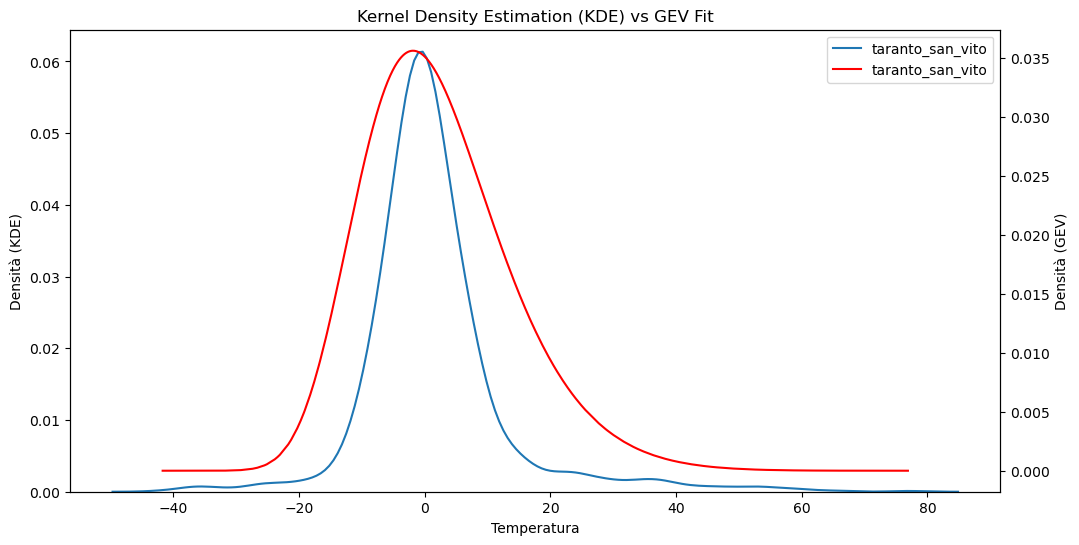

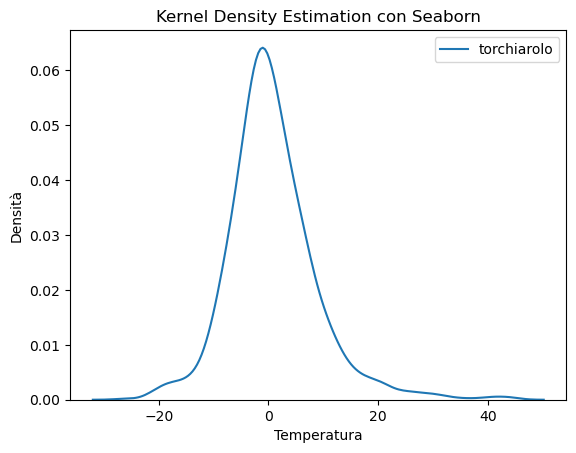

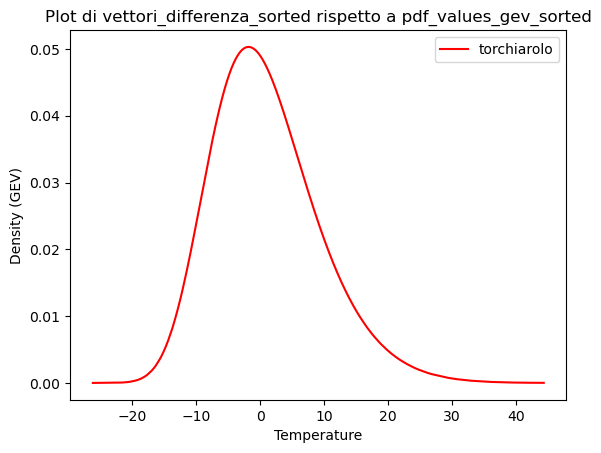

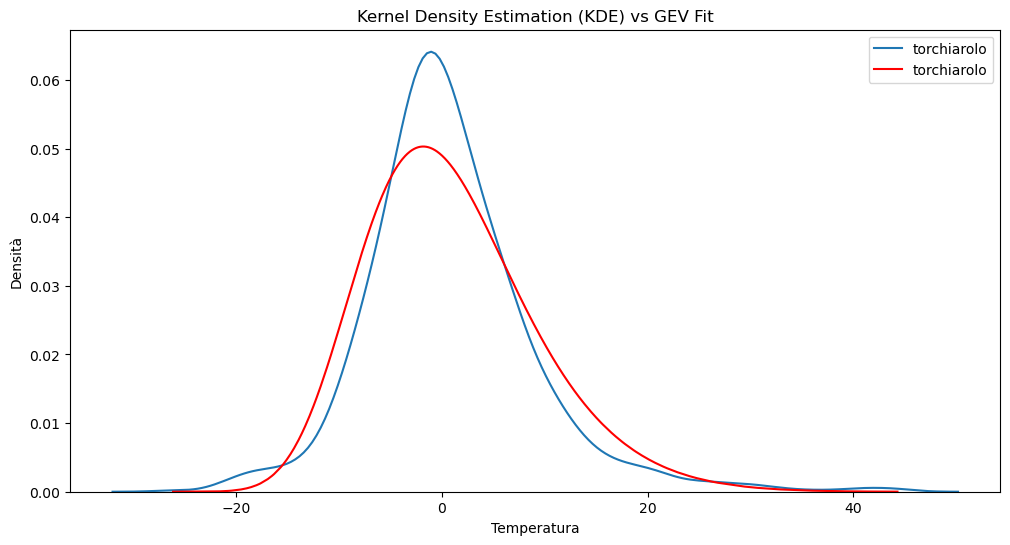

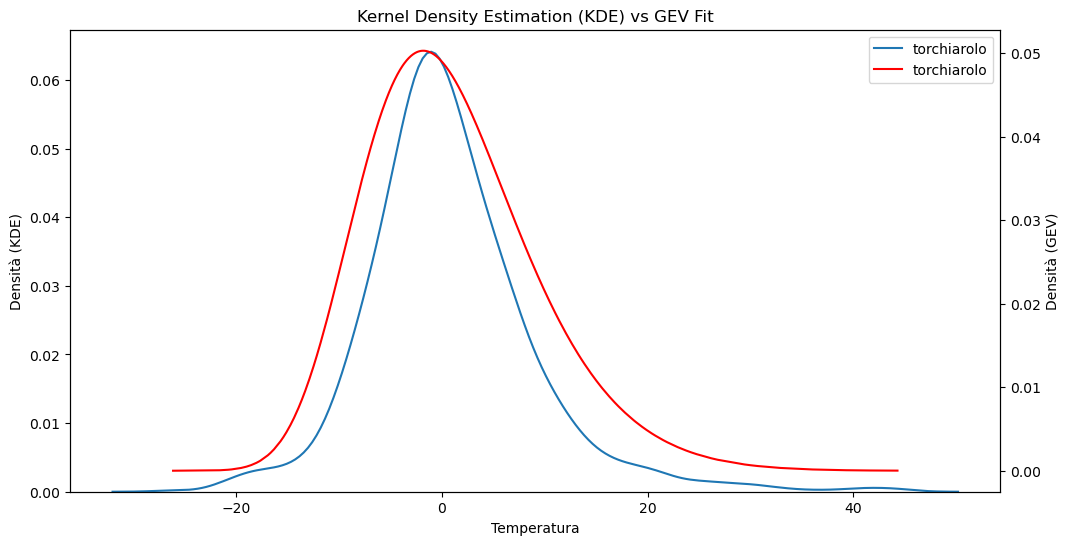

In [8]:
vettori_differenza = []
for i in range (0, len(stazioni)):
    path = f"/Users/reginacastrovilli/paper/Data_Max_Min/{stazioni[i]}.csv"
    file = pd.read_csv(path,sep=";")
    dat_0 = file['umr_min'] #umr_min
    y = dat_0.dropna()

    #filtro Lowess
    # Impostazione del valore di frac in base alla stazione
    lowess = sm.nonparametric.lowess(y, range(len(y)), frac = 0.007)
    lowess_y = lowess[:,1]

    #calcolo vettore differenza
    Y_low = y - lowess_y
    
    #aggiunta vettore differenza alla lista
    vettori_differenza.append(Y_low)

#plot tutti i vettori differenza
for i, stazione in enumerate(stazioni):
    '''    
    #una serie di x sulla base dei dati
    x_vals = np.linspace(min(vettori_differenza[i]), max(vettori_differenza[i]), len(vettori_differenza[i]) + 1)

    #oggetto KDE
    kde = gaussian_kde(vettori_differenza[i])
    #calcolo dei valori della pdf
    pdf_values_edf = kde(x_vals)
    
    
    plt.plot(x_vals, pdf_values_edf, label = stazione) 
    i dati sembrano trovarsi in uno spazio di dimensione inferiore rispetto a quanto indicato dalla dimensione dei dati. Questo problema può essere causato da varie ragioni, inclusi dati con dimensioni ridotte o dati che giacciono in un sottoinsieme più basso dello spazio.
    '''
    '''    # Calcola la deviazione standard e il numero di campioni
    sigma_hat = vettori_differenza[i].std()
    n = len(vettori_differenza[i])

    # Calcola la larghezza della banda con la regola di Silverman
    bandwidth_value = (4 * sigma_hat**5 / (3 * n))**(1/5)
    
    # Esegui KDE con statsmodels
    kde = sm.nonparametric.KDEUnivariate(vettori_differenza[i])
    kde.fit(bw=bandwidth_value) 
    
    # Plot della KDE
    plt.plot(kde.support, kde.density, label= stazione)
    plt.xlabel('Temperatura')
    plt.ylabel('Densità')
    plt.title('Kernel Density Estimation con statsmodels')
    plt.legend()
    #plt.show()
    #plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/Emp/{stazioni[i]}.pdf")
    plt.close'''

    plt.figure()

    # Utilizza Seaborn per la KDE
    sns.kdeplot(vettori_differenza[i], label=stazione)

    plt.xlabel('Temperatura')
    plt.ylabel('Densità')
    plt.title('Kernel Density Estimation con Seaborn')
    plt.legend()

    # Salva l'immagine o mostra il plot
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/Emp/umr_con_seaborn/{stazioni[i]}.pdf")
    plt.show()

    #parametri per la GEV 
    shape, loc, scale = stats.genextreme.fit(vettori_differenza[i])

    #calcolo dei valori della PDF della GEV
    pdf_values_gev = gev.pdf(vettori_differenza[i], shape, loc, scale)

    #ordine
    vettori_differenza_sorted, pdf_values_gev_sorted = zip(*sorted(zip(vettori_differenza[i], pdf_values_gev)))

    #plot GEV
    plt.plot(vettori_differenza_sorted, pdf_values_gev_sorted, 'r-',label= stazione)
    plt.xlabel('Temperature')
    plt.ylabel('Density (GEV)')
    plt.title('Plot di vettori_differenza_sorted rispetto a pdf_values_gev_sorted')
    plt.legend()
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/Gev/umr/{stazioni[i]}.pdf")
    plt.show()


    plt.figure(figsize=(12, 6))

    # Utilizza Seaborn per la KDE
    sns.kdeplot(vettori_differenza[i], label= stazione)
    
    # Fai il plot GEV
    plt.plot(vettori_differenza_sorted, pdf_values_gev_sorted, 'r-', label= stazione)
    
    plt.xlabel('Temperatura')
    plt.ylabel('Densità')
    plt.title('Kernel Density Estimation (KDE) vs GEV Fit')
    plt.legend()
    
    # Salva l'immagine o mostra il plot
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/Gev_vs_emp_same_scale/umr/{stazione}.pdf")
    plt.show()


    # Creare una figura e gli assi principali
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Utilizza Seaborn per la KDE sull'asse principale (ax1)
    sns.kdeplot(vettori_differenza[i], label= stazione, ax=ax1)
    
    # Imposta etichette e titolo per l'asse principale
    ax1.set_xlabel('Temperatura')
    ax1.set_ylabel('Densità (KDE)')
    ax1.set_title('Kernel Density Estimation (KDE) vs GEV Fit')
    
    # Crea assi secondari per il plot GEV
    ax2 = ax1.twinx()
    
    # Fai il plot GEV sugli assi secondari (ax2)
    ax2.plot(vettori_differenza_sorted, pdf_values_gev_sorted, 'r-', label = stazione)
    
    # Imposta etichette per gli assi secondari
    ax2.set_ylabel('Densità (GEV)')
    
    # Aggiungi una legenda combinata per entrambi gli assi
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')
    
    # Mostra o salva il plot
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/Gev_vs_emp_diff_scale/umr/{stazione}.pdf")
    plt.show()


<Figure size 640x480 with 0 Axes>

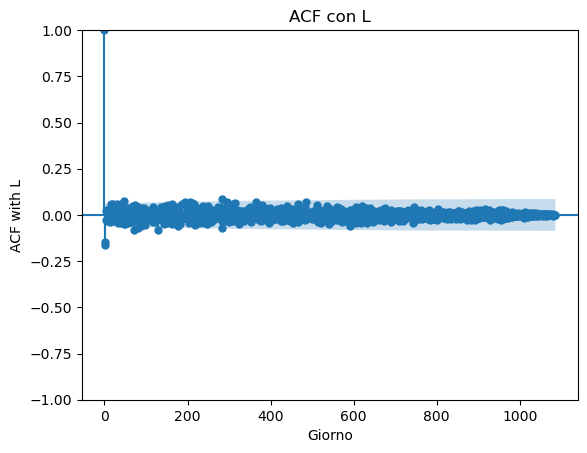

<Figure size 640x480 with 0 Axes>

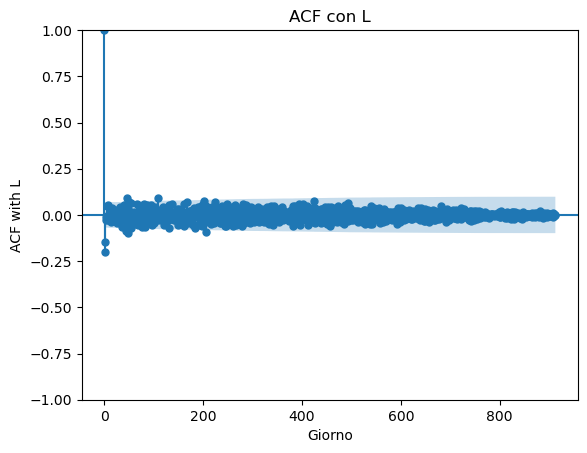

<Figure size 640x480 with 0 Axes>

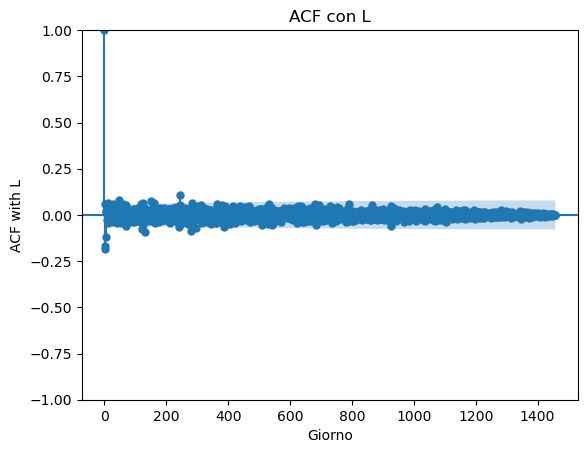

<Figure size 640x480 with 0 Axes>

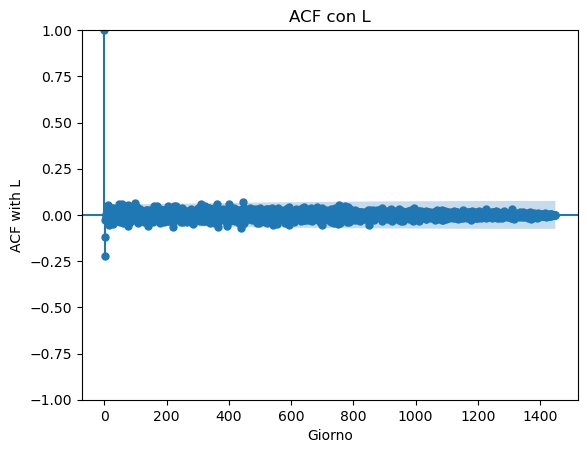

<Figure size 640x480 with 0 Axes>

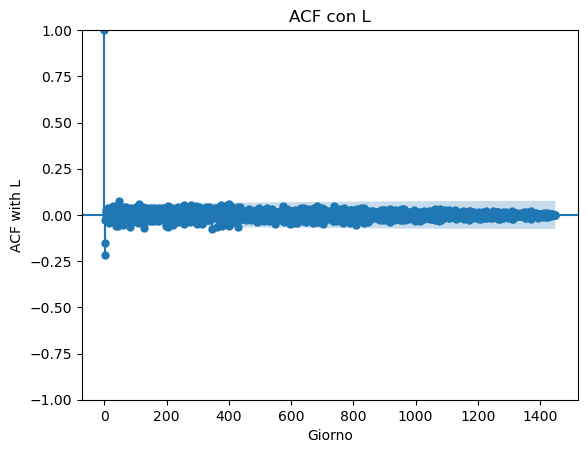

<Figure size 640x480 with 0 Axes>

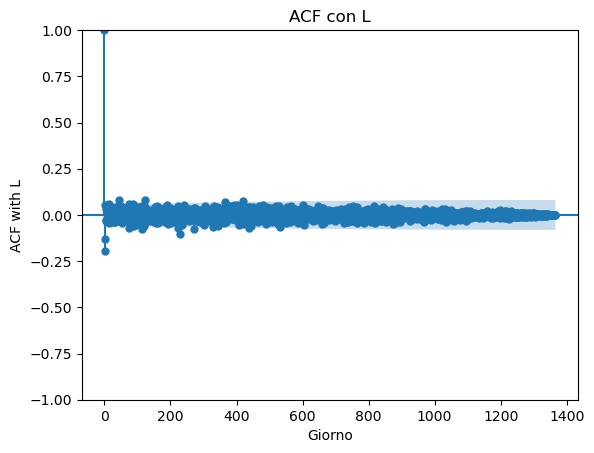

<Figure size 640x480 with 0 Axes>

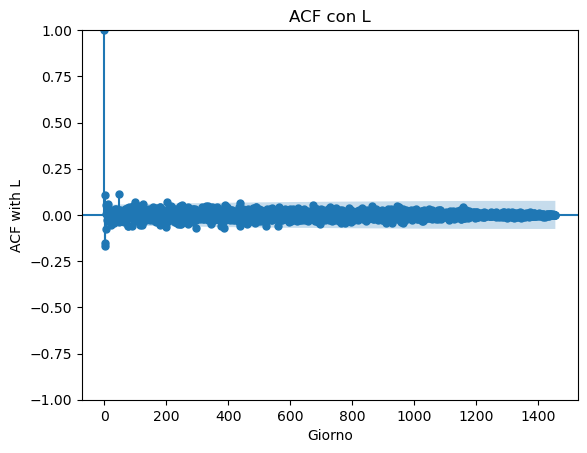

<Figure size 640x480 with 0 Axes>

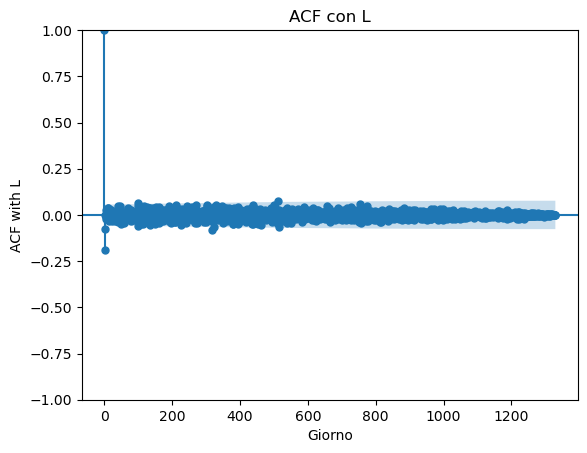

<Figure size 640x480 with 0 Axes>

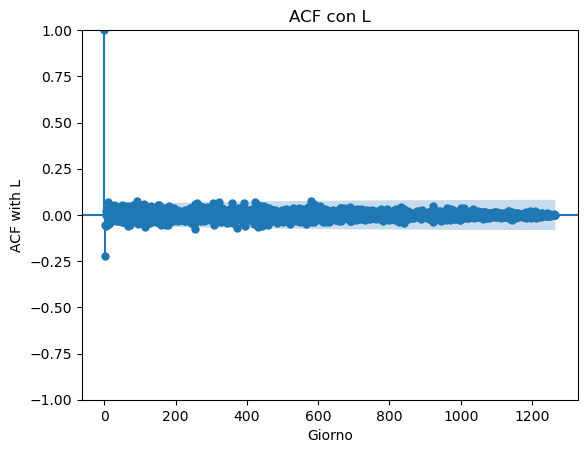

<Figure size 640x480 with 0 Axes>

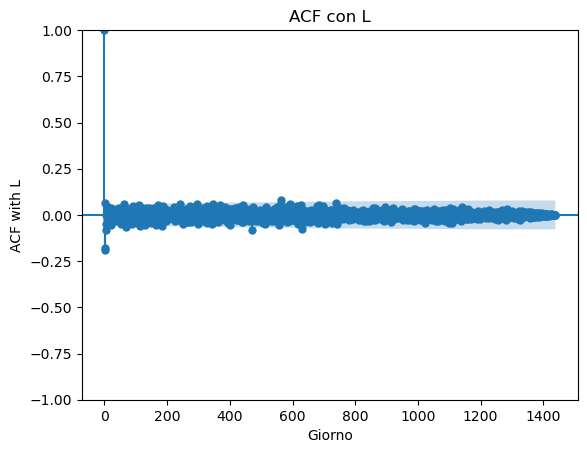

<Figure size 640x480 with 0 Axes>

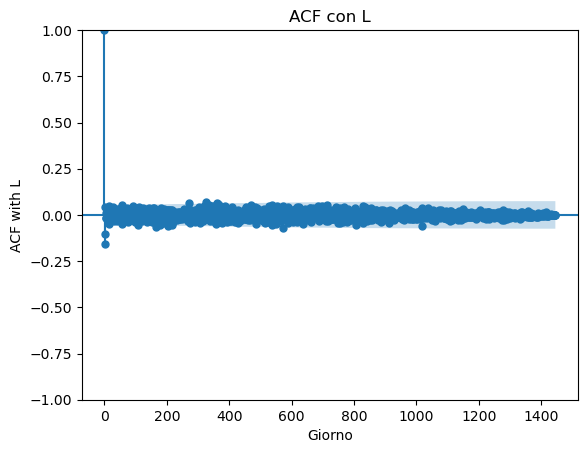

<Figure size 640x480 with 0 Axes>

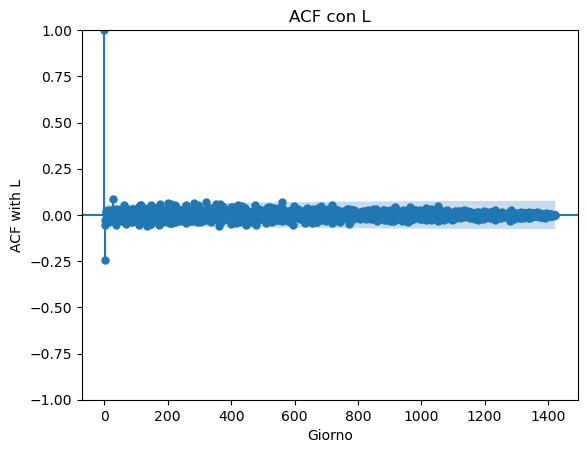

<Figure size 640x480 with 0 Axes>

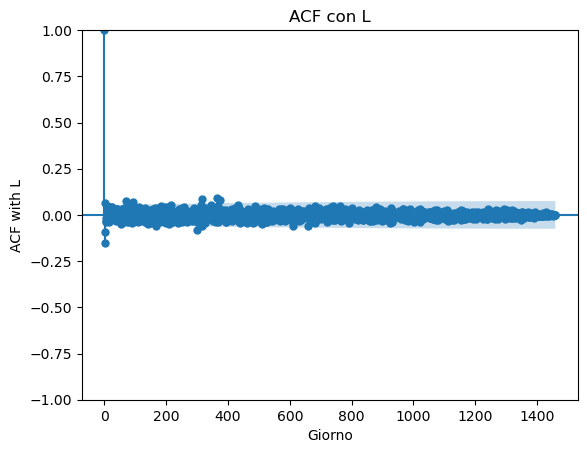

<Figure size 640x480 with 0 Axes>

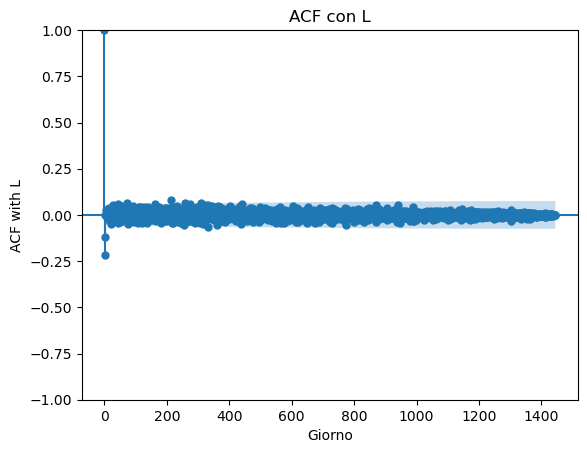

<Figure size 640x480 with 0 Axes>

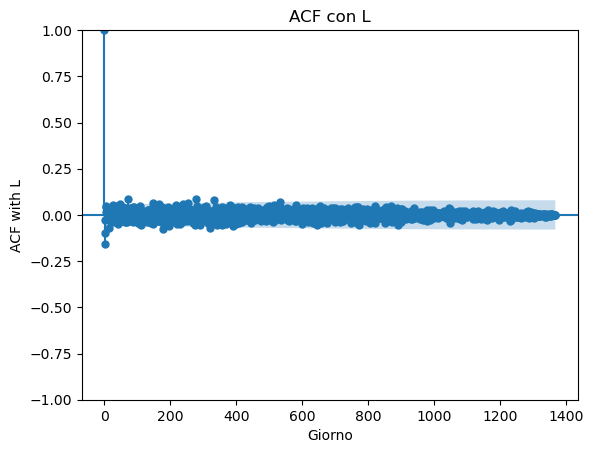

<Figure size 640x480 with 0 Axes>

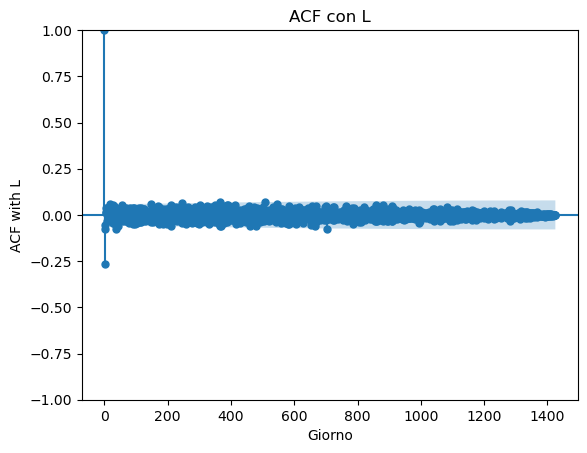

<Figure size 640x480 with 0 Axes>

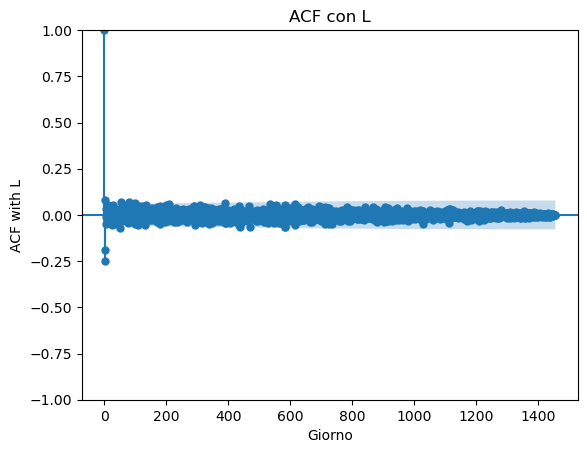

<Figure size 640x480 with 0 Axes>

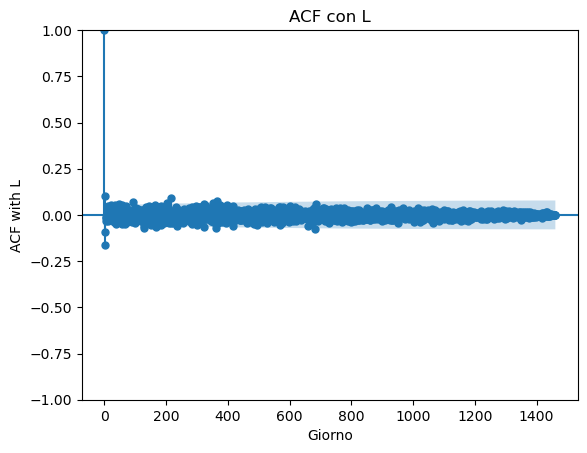

<Figure size 640x480 with 0 Axes>

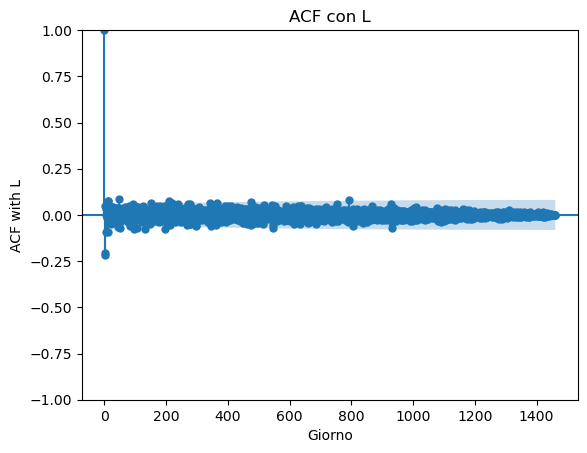

<Figure size 640x480 with 0 Axes>

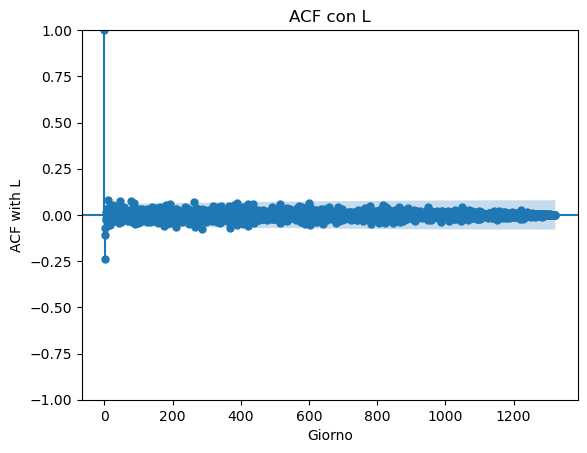

<Figure size 640x480 with 0 Axes>

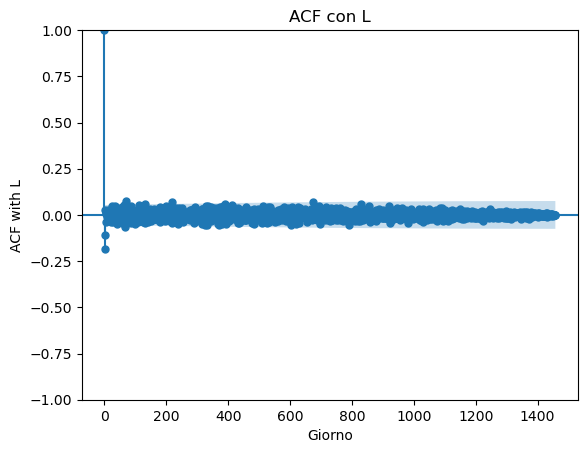

<Figure size 640x480 with 0 Axes>

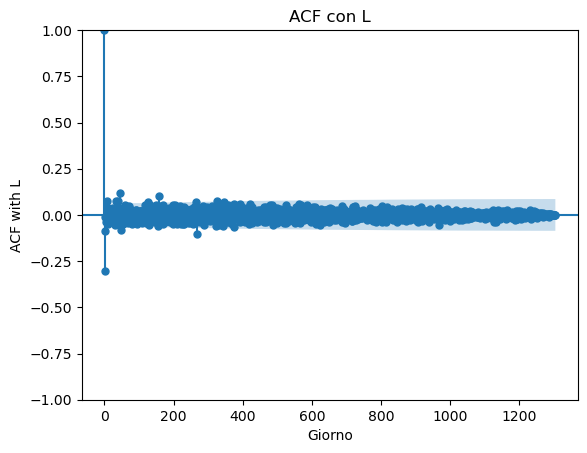

<Figure size 640x480 with 0 Axes>

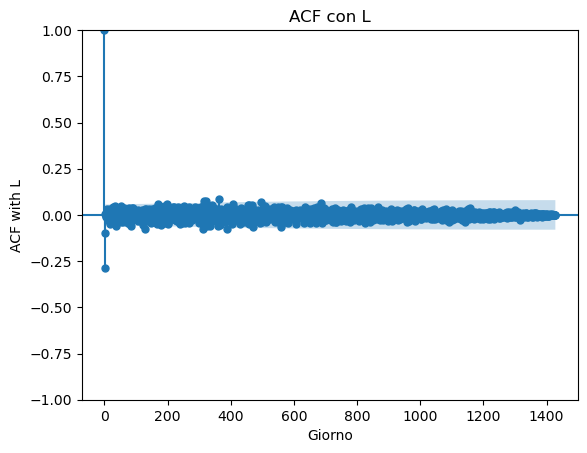

<Figure size 640x480 with 0 Axes>

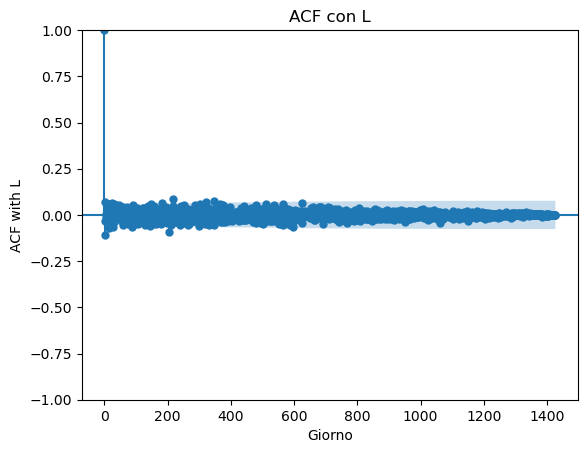

<Figure size 640x480 with 0 Axes>

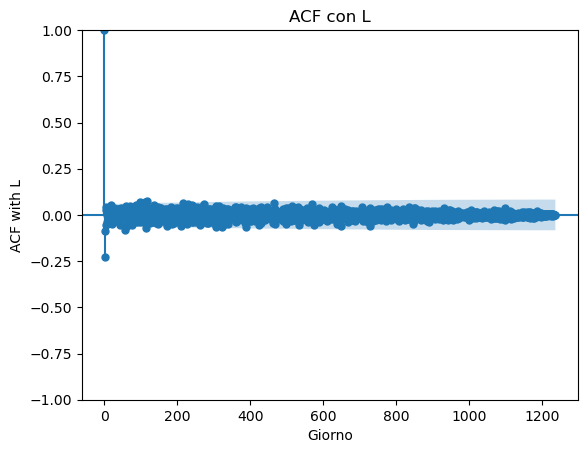

In [9]:
for i, stazione in enumerate(stazioni):
        
    #Plot ACF
    
    plt.figure()
    plot_acf(vettori_differenza[i], lags=range(0, len(vettori_differenza[i])))
    plt.title('ACF con L')
    plt.xlabel('Giorno')
    plt.ylabel('ACF with L')
    plt.show()
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/acf_con_low/umidità/{stazione}.pdf")
    plt.close()